- <a href='#1'>1. Get the Data</a>
- <a href='#2'>2. Check the Data</a>
- <a href='#3'> 3. Explore the data</a>
    - <a href='#3-1'>3.1 Categorical features</a>
    - <a href='#3-2'>3.2 Numerical features</a>
    - <a href='#3-3'>3.3 Categorical features by label</a>
    - <a href='#3-4'>3.4 Numerical features by label</a>
    - <a href='#3-5'>3.5 Correlation Matrix</a>

> ## <a id='1'>1. Get the data</a>

In [41]:
import pandas as pd
import os, sys
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
import gc
import warnings
import time
warnings.filterwarnings("ignore")

default_dir = "/content/drive/My Drive/group6_Final_DP/data/raw_data"

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
application_train = pd.read_csv(os.path.join(default_dir, 'application_train.csv'))
application_test = pd.read_csv(os.path.join(default_dir, 'application_test.csv'))
bureau = pd.read_csv(os.path.join(default_dir, 'bureau.csv'))
bureau_balance = pd.read_csv(os.path.join(default_dir, 'bureau_balance.csv'))
POS_CASH_balance = pd.read_csv(os.path.join(default_dir, 'POS_CASH_balance.csv'))
credit_card_balance = pd.read_csv(os.path.join(default_dir, 'credit_card_balance.csv'))
previous_application = pd.read_csv(os.path.join(default_dir, 'previous_application.csv'))
installments_payments = pd.read_csv(os.path.join(default_dir, 'installments_payments.csv'))

In [44]:
print(application_train.shape)
print(application_test.shape)
print(POS_CASH_balance.shape)
print(bureau.shape)
print(bureau_balance.shape)
print(previous_application.shape)
print(installments_payments.shape)
print(credit_card_balance.shape)

(246009, 123)
(61502, 122)
(8543375, 8)
(1465325, 17)
(27299925, 3)
(1413701, 37)
(7744758, 8)
(3227965, 23)


## <a id='2'>2. Check the data</a>
### 2.1 application train / test

In [45]:
application_train.head()

,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.796,0.0605,0.08,0.0345,0.2917,0.3333,0.013,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.804,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,3,

In [46]:
application_train.columns.values

array(['Unnamed: 0', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [47]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246009 entries, 0 to 246008
Columns: 123 entries, Unnamed: 0 to SK_ID_CURR
dtypes: float64(65), int64(42), object(16)
memory usage: 230.9+ MB


In [48]:
application_train.describe()

,Unnamed: 0,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
count,246009.000000,246009.000000,246009.000000,2.460090e+05,2.460090e+05,245999.000000,2.457850e+05,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,83821.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246008.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,107484.000000,2.454800e+05,197185.000000,121025.000000,101993.000000,125927.000000,82325.000000,74079.000000,114800.000000,122060.000000,123476.000000,79054.000000,99879.000000,77812.000000,122421.000000,75140.000000,110065.000000,121025.000000,101993.000000,125927.000000,82325.000000,74079.000000,114800.000000,122060.000000,123476.000000,79054.000000,99879.000000,77812.000000,122421.000000,75140.000000,110065.000000,121025.000000,101993.000000,125927.000000,82325.000000,74079.000000,114800.000000,122060.000000,123476.000000,79054.000000,99879.000000,77812.000000,122421.000000,75140.000000,110065.000000,127190.000000,245204.000000,245204.000000,245204.000000,245204.000000,246008.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,246009.000000
mean,123004.000000,0.080794,0.416229,1.684589e+05,5.996410e+05,27120.238129,5.389827e+05,0.020855,-16038.946343,63852.612441,-4985.222248,-2992.974509,12.042293,0.999996,0.819787,0.198928,0.998114,0.280665,0.056961,2.152637,2.052616,2.031682,12.063372,0.015227,0.050921,0.040686,0.078363,0.230142,0.179148,0.502462,5.143854e-01,0.511034,0.117422,0.088463,0.977713,0.752876,0.044533,0.079023,0.149660,0.226512,0.232112,0.066439,0.100839,0.107483,0.008882,0.028339,0.114131,0.087532,0.977049,0.760014,0.042453,0.074538,0.145133,0.222510,0.228227,0.065007,0.105644,0.105985,0.008141,0.026954,0

In [49]:
def find_missing(data):
    # number of missing values
    count_missing = data.isnull().sum().values
    # total records
    total = data.shape[0]
    # percentage of missing
    ratio_missing = count_missing/total
    # check df information
    return pd.DataFrame(data={'missing_count':count_missing, 'missing_ratio':ratio_missing}, index=data.columns.values)
find_missing(application_train).head(12)

,missing_count,missing_ratio
Unnamed: 0,0,0.000000
TARGET,0,0.000000
NAME_CONTRACT_TYPE,0,0.000000
CODE_GENDER,0,0.000000
FLAG_OWN_CAR,0,0.000000
FLAG_OWN_REALTY,0,0.000000
CNT_CHILDREN,0,0.000000
AMT_INCOME_TOTAL,0,0.000000
AMT_CREDIT,0,0.000000
AMT_ANNUITY,10,0.000041


### 2.2 POS_CASH_balance

In [50]:
POS_CASH_balance.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,1803195,-31,48.0,45.0,Active,0,0,185279
1,1803195,-17,48.0,31.0,Active,0,0,185279
2,1803195,-21,48.0,35.0,Active,0,0,185279
3,1803195,-8,48.0,21.0,Active,0,0,185279
4,1803195,-4,48.0,17.0,Active,0,0,185279


In [51]:
POS_CASH_balance.columns.values

array(['SK_ID_PREV', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF', 'SK_ID_CURR'], dtype=object)

In [52]:
POS_CASH_balance.describe()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,SK_ID_CURR
count,8.543375e+06,8.543375e+06,8.521512e+06,8.521497e+06,8.543375e+06,8.543375e+06,8.543375e+06
mean,1.903489e+06,-3.494812e+01,1.703348e+01,1.046808e+01,1.190473e+01,5.835209e-01,1.535356e+05
std,5.359387e+05,2.605372e+01,1.200430e+01,1.114408e+01,1.340302e+02,3.042110e+01,8.871661e+04
min,1.000001e+06,-9.600000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434475e+06,-5.400000e+01,1.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00,7.662200e+04
50%,1.896878e+06,-2.800000e+01,1.200000e+01,7.000000e+00,0.000000e+00,0.000000e+00,1.533150e+05
75%,2.369096e+06,-1.300000e+01,2.400000e+01,1.400000e+01,0.000000e+00,0.000000e+00,2.302930e+05
max,2.843499e+06,-1.000000e+00,8.400000e+01,8.400000e+01,4.231000e+03,3.373000e+03,3.075100e+05


In [53]:
find_missing(POS_CASH_balance).head(12)

,missing_count,missing_ratio
SK_ID_PREV,0,0.000000
MONTHS_BALANCE,0,0.000000
CNT_INSTALMENT,21863,0.002559
CNT_INSTALMENT_FUTURE,21878,0.002561
NAME_CONTRACT_STATUS,0,0.000000
SK_DPD,0,0.000000
SK_DPD_DEF,0,0.000000
SK_ID_CURR,0,0.000000


In [54]:
for i in POS_CASH_balance.columns:
    print(i)
    print(POS_CASH_balance[i][POS_CASH_balance[i]=="XNA"].count())
    print(POS_CASH_balance[i][POS_CASH_balance[i]=="XAP"].count())

SK_ID_PREV
0
0
MONTHS_BALANCE
0
0
CNT_INSTALMENT
0
0
CNT_INSTALMENT_FUTURE
0
0
NAME_CONTRACT_STATUS
2
0
SK_DPD
0
0
SK_DPD_DEF
0
0
SK_ID_CURR
0
0


In [55]:
POS_CASH_balance.NAME_CONTRACT_STATUS.value_counts()


,count
NAME_CONTRACT_STATUS,
Active,7818577
Completed,634872
Signed,74625
Demand,6110
Returned to the store,4591
Approved,4221
Amortized debt,365
Canceled,12
XNA,2


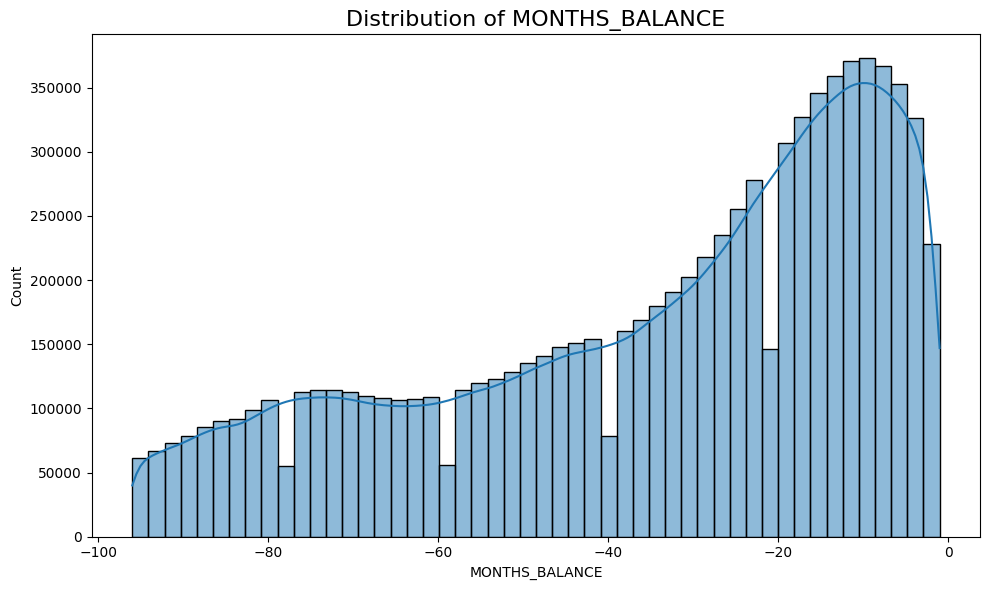

In [56]:
# Phân phối của Months of Balance
plt.figure(figsize=(10, 6))
sns.histplot(POS_CASH_balance['MONTHS_BALANCE'], kde=True, bins=50)
plt.title('Distribution of MONTHS_BALANCE', fontsize=16)
plt.tight_layout()
plt.show()

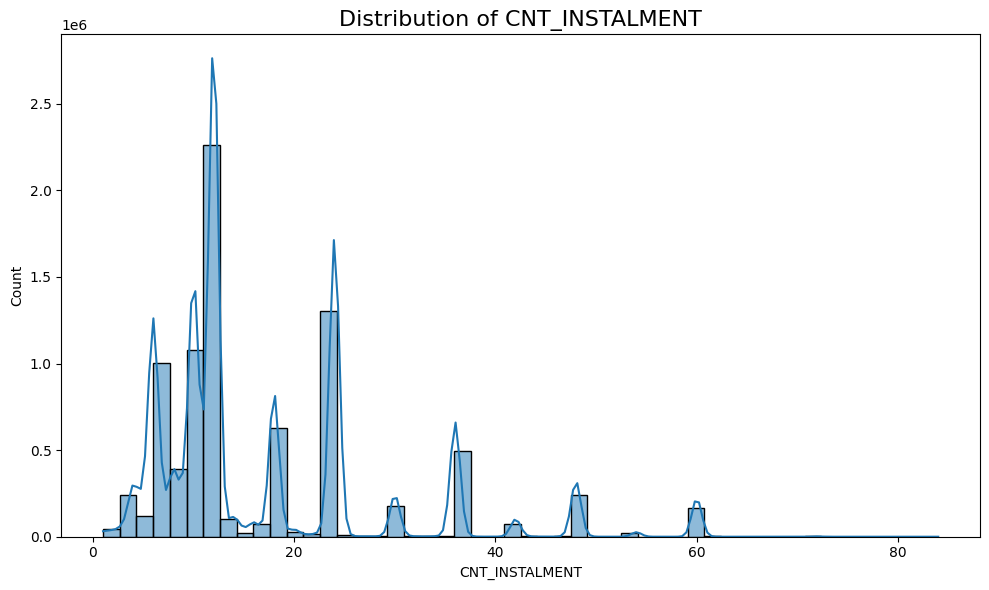

In [57]:
# Phân phối của CNT_INSTALMENT
plt.figure(figsize=(10, 6))
sns.histplot(POS_CASH_balance['CNT_INSTALMENT'], kde=True, bins=50)
plt.title('Distribution of CNT_INSTALMENT', fontsize=16)
plt.tight_layout()
plt.show()

### 2.3 bureau

In [58]:
bureau.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


In [59]:
bureau.columns.values

array(['SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'DAYS_CREDIT',
       'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT',
       'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM',
       'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY', 'SK_ID_CURR'], dtype=object)

In [60]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465325 entries, 0 to 1465324
Data columns (total 17 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_BUREAU            1465325 non-null  int64  
 1   CREDIT_ACTIVE           1465325 non-null  object 
 2   CREDIT_CURRENCY         1465325 non-null  object 
 3   DAYS_CREDIT             1465325 non-null  int64  
 4   CREDIT_DAY_OVERDUE      1465325 non-null  int64  
 5   DAYS_CREDIT_ENDDATE     1376227 non-null  float64
 6   DAYS_ENDDATE_FACT       920652 non-null   float64
 7   AMT_CREDIT_MAX_OVERDUE  516780 non-null   float64
 8   CNT_CREDIT_PROLONG      1465325 non-null  int64  
 9   AMT_CREDIT_SUM          1465322 non-null  float64
 10  AMT_CREDIT_SUM_DEBT     1242231 non-null  float64
 11  AMT_CREDIT_SUM_LIMIT    975655 non-null   float64
 12  AMT_CREDIT_SUM_OVERDUE  1465325 non-null  float64
 13  CREDIT_TYPE             1465325 non-null  object 
 14  DA

In [61]:
bureau.describe()

,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
count,1.465325e+06,1.465325e+06,1.465325e+06,1.376227e+06,920652.000000,5.167800e+05,1.465325e+06,1.465322e+06,1.242231e+06,9.756550e+05,1.465325e+06,1.465325e+06,3.353120e+05,1.465325e+06
mean,5.890328e+06,-1.143600e+03,8.887612e-01,4.931322e+02,-1022.765286,3.942852e+03,7.278249e-03,3.516889e+05,1.358890e+05,6.363687e+03,4.010547e+01,-5.997869e+02,1.576301e+04,1.538762e+05
std,5.378271e+05,8.000200e+02,3.824707e+01,4.964905e+03,718.371749,2.196856e+05,1.026408e-01,1.078009e+06,6.756650e+05,4.543915e+04,6.273639e+03,7.371010e+02,2.681074e+05,8.889888e+04
min,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-42023.000000,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00,0.000000e+00
25%,5.416944e+06,-1.671000e+03,0.000000e+00,-1.144000e+03,-1503.000000,0.000000e+00,0.000000e+00,5.116500e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.040000e+02,0.000000e+00,7.668500e+04
50%,5.856021e+06,-9.850000e+02,0.000000e+00,-3.340000e+02,-900.000000,0.000000e+00,0.000000e+00,1.246981e+05,0.000000e+00,0.000000e+00,0.000000e+00,-4.060000e+02,6.750000e+01,1.540400e+05
75%,6.363543e+06,-4.700000e+02,0.000000e+00,4.730000e+02,-427.000000,0.000000e+00,0.000000e+00,3.082500e+05,3.965400e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.399050e+04,2.308560e+05
max,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000,1.159872e+08,9.000000e+00,3.960000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,5.958668e+07,3.075090e+05


In [62]:
find_missing(bureau).head(12)

,missing_count,missing_ratio
SK_ID_BUREAU,0,0.000000
CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,0,0.000000
CREDIT_DAY_OVERDUE,0,0.000000
DAYS_CREDIT_ENDDATE,89098,0.060804
DAYS_ENDDATE_FACT,544673,0.371708
AMT_CREDIT_MAX_OVERDUE,948545,0.647327
CNT_CREDIT_PROLONG,0,0.000000
AMT_CREDIT_SUM,3,0.000002


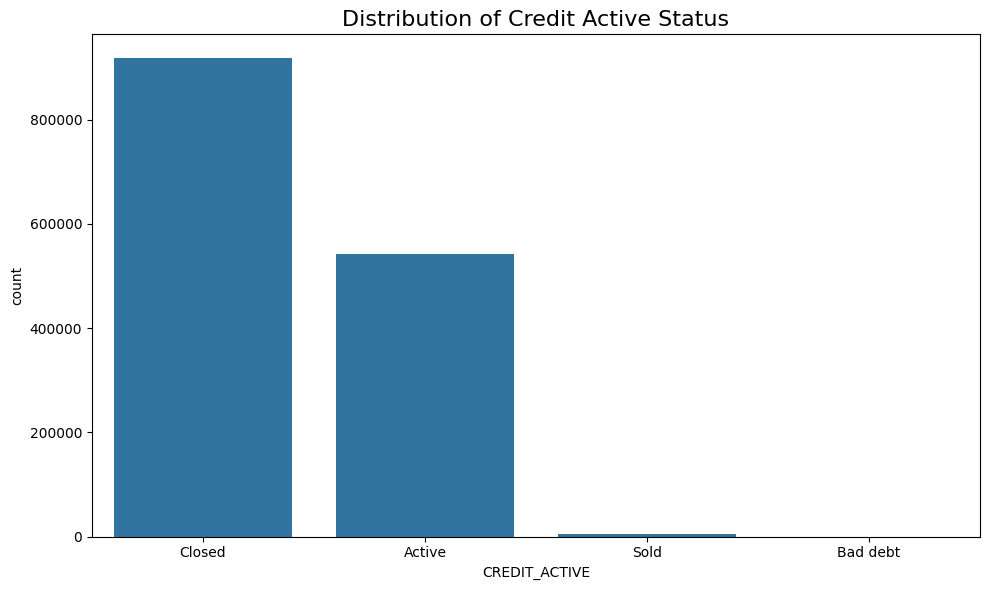

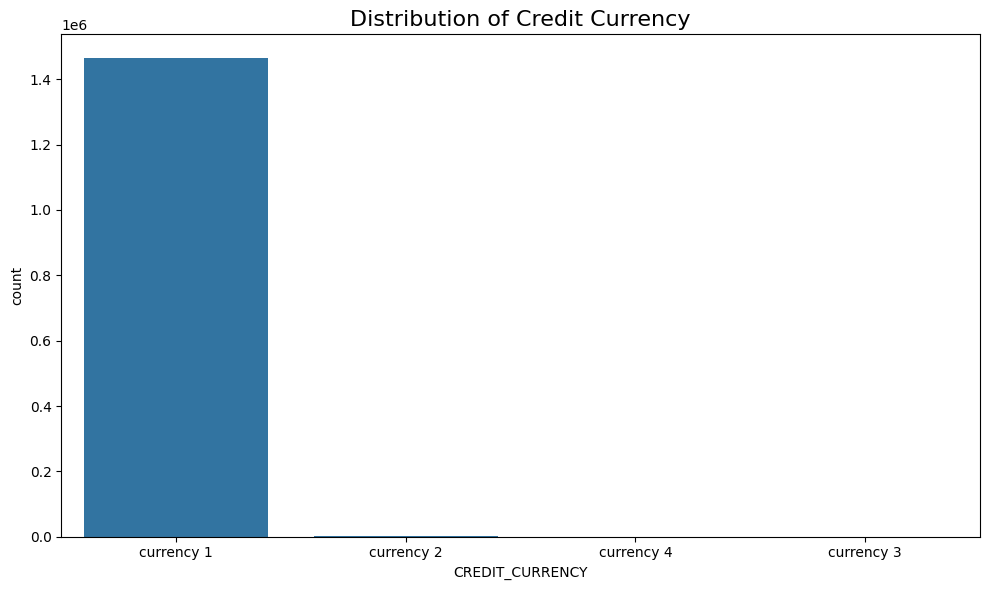

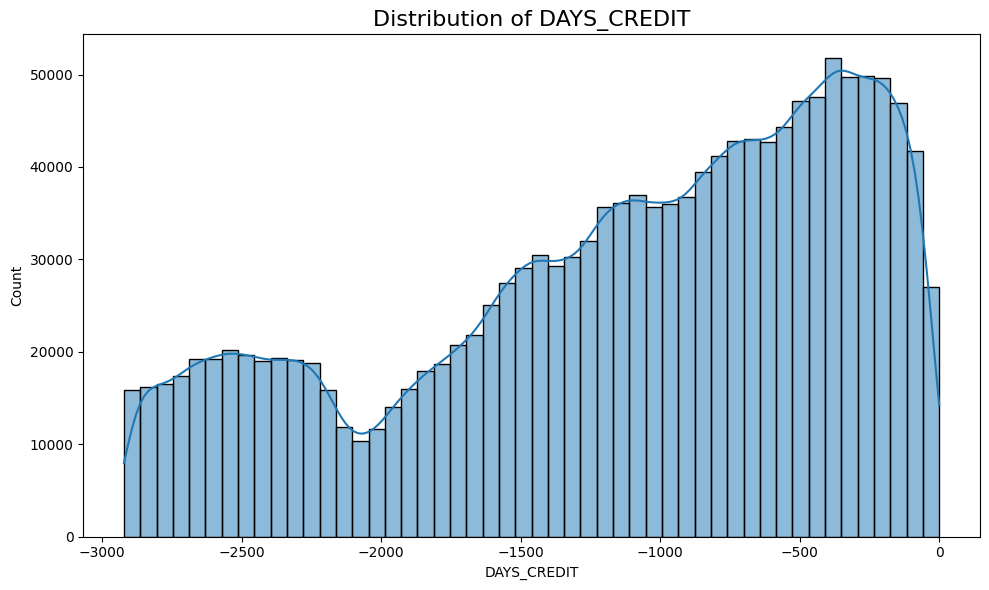

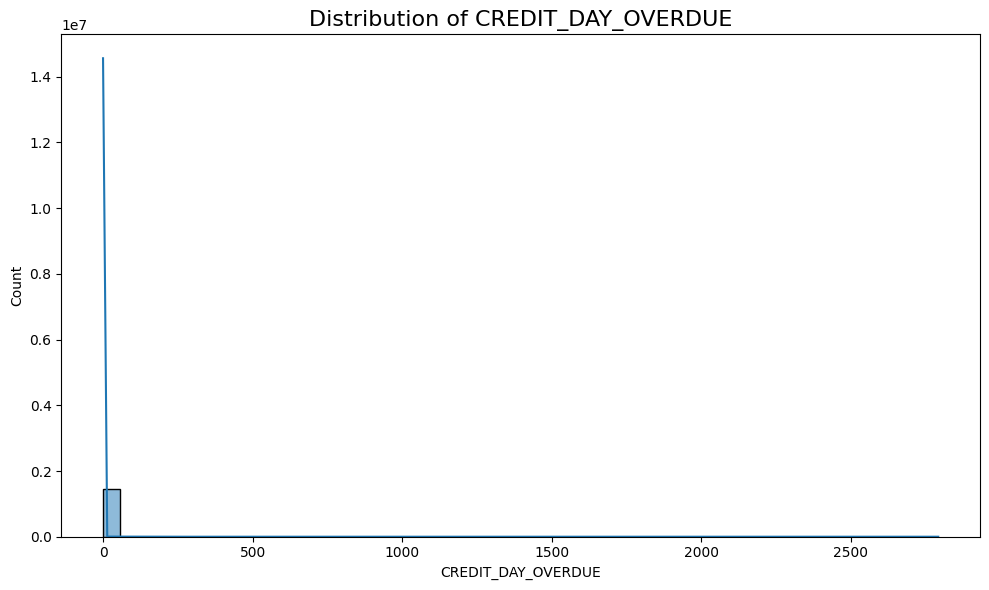

In [63]:
# Phân phối của CREDIT_ACTIVE
plt.figure(figsize=(10, 6))
sns.countplot(x='CREDIT_ACTIVE', data=bureau)
plt.title('Distribution of Credit Active Status', fontsize=16)
plt.tight_layout()
plt.show()

# Phân phối của CREDIT_CURRENCY
plt.figure(figsize=(10, 6))
sns.countplot(x='CREDIT_CURRENCY', data=bureau)
plt.title('Distribution of Credit Currency', fontsize=16)
plt.tight_layout()
plt.show()

# Phân phối của DAYS_CREDIT (Số ngày kể từ khi cấp tín dụng)
plt.figure(figsize=(10, 6))
sns.histplot(bureau['DAYS_CREDIT'], kde=True, bins=50)
plt.title('Distribution of DAYS_CREDIT', fontsize=16)
plt.tight_layout()
plt.show()

# Phân phối của CREDIT_DAY_OVERDUE (Số ngày quá hạn tín dụng)
plt.figure(figsize=(10, 6))
sns.histplot(bureau['CREDIT_DAY_OVERDUE'], kde=True, bins=50)
plt.title('Distribution of CREDIT_DAY_OVERDUE', fontsize=16)
plt.tight_layout()
plt.show()


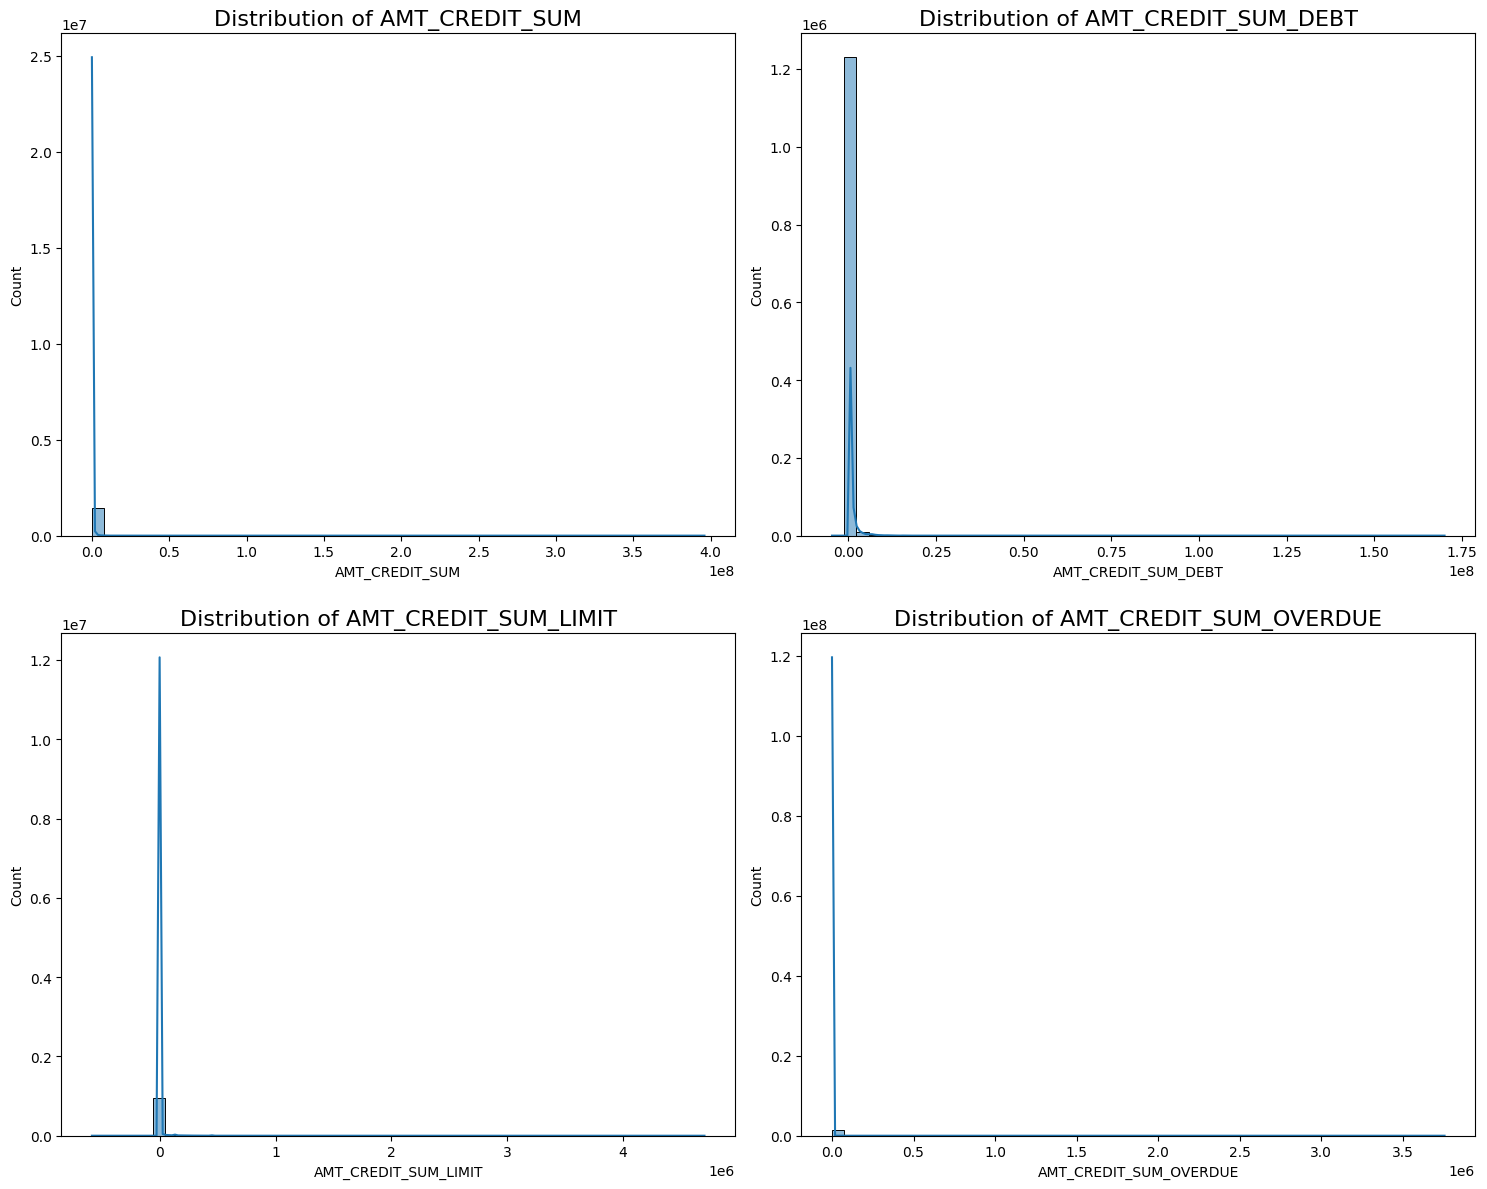

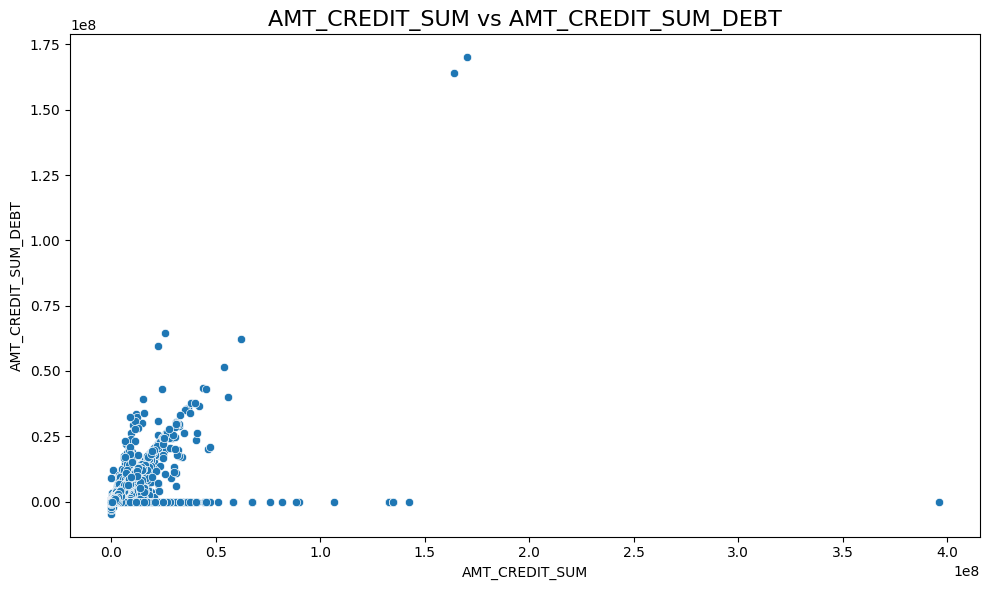

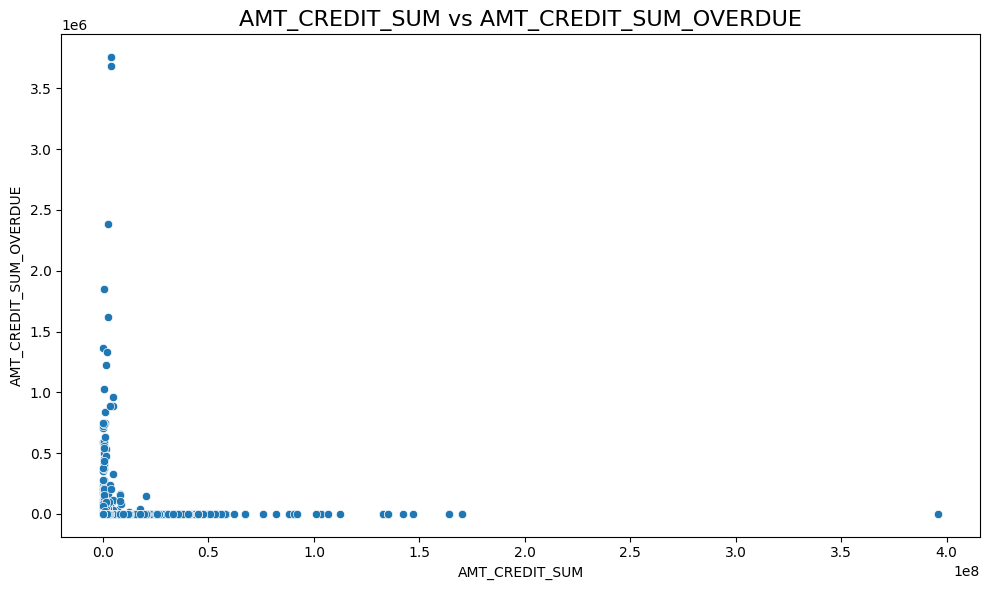

In [64]:
# Phân tích các khoản vay với các giá trị tài chính
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# AMT_CREDIT_SUM (Tổng tín dụng)
sns.histplot(bureau['AMT_CREDIT_SUM'], kde=True, bins=50, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of AMT_CREDIT_SUM', fontsize=16)

# AMT_CREDIT_SUM_DEBT (Tổng nợ)
sns.histplot(bureau['AMT_CREDIT_SUM_DEBT'], kde=True, bins=50, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of AMT_CREDIT_SUM_DEBT', fontsize=16)

# AMT_CREDIT_SUM_LIMIT (Tổng hạn mức tín dụng)
sns.histplot(bureau['AMT_CREDIT_SUM_LIMIT'], kde=True, bins=50, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of AMT_CREDIT_SUM_LIMIT', fontsize=16)

# AMT_CREDIT_SUM_OVERDUE (Tổng quá hạn tín dụng)
sns.histplot(bureau['AMT_CREDIT_SUM_OVERDUE'], kde=True, bins=50, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of AMT_CREDIT_SUM_OVERDUE', fontsize=16)
plt.tight_layout()
plt.show()

# Mối quan hệ giữa các số liệu tài chính
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_CREDIT_SUM', y='AMT_CREDIT_SUM_DEBT', data=bureau)
plt.title('AMT_CREDIT_SUM vs AMT_CREDIT_SUM_DEBT', fontsize=16)
plt.tight_layout()
plt.show()

# Mối quan hệ giữa "AMT_CREDIT_SUM" và "AMT_CREDIT_SUM_OVERDUE"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AMT_CREDIT_SUM', y='AMT_CREDIT_SUM_OVERDUE', data=bureau)
plt.title('AMT_CREDIT_SUM vs AMT_CREDIT_SUM_OVERDUE', fontsize=16)
plt.tight_layout()
plt.show()


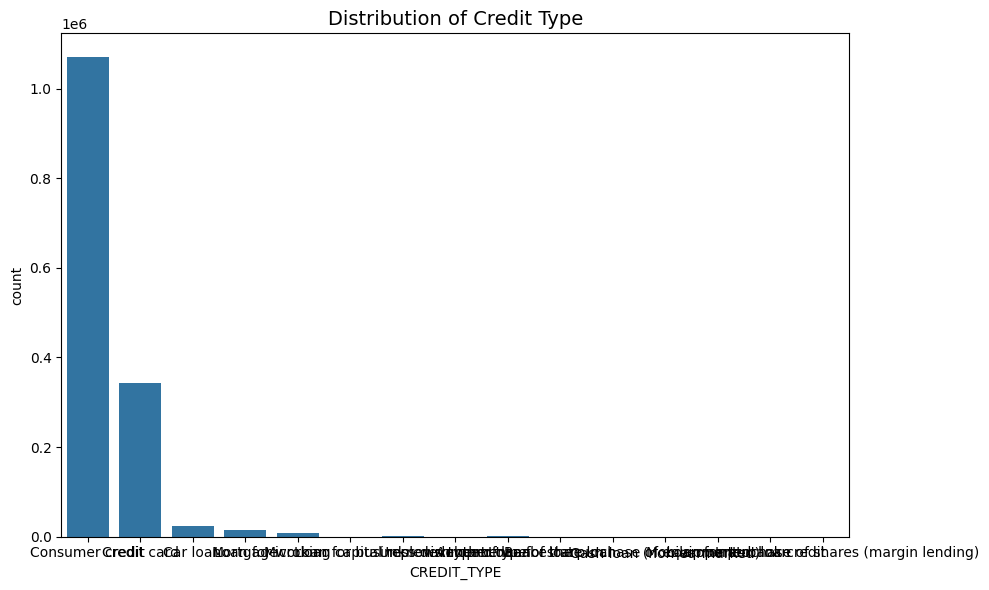

In [65]:
# Phân phối của CREDIT_TYPE
plt.figure(figsize=(10, 6))
sns.countplot(x='CREDIT_TYPE', data=bureau)
plt.title('Distribution of Credit Type', fontsize=14)
plt.tight_layout()
plt.show()

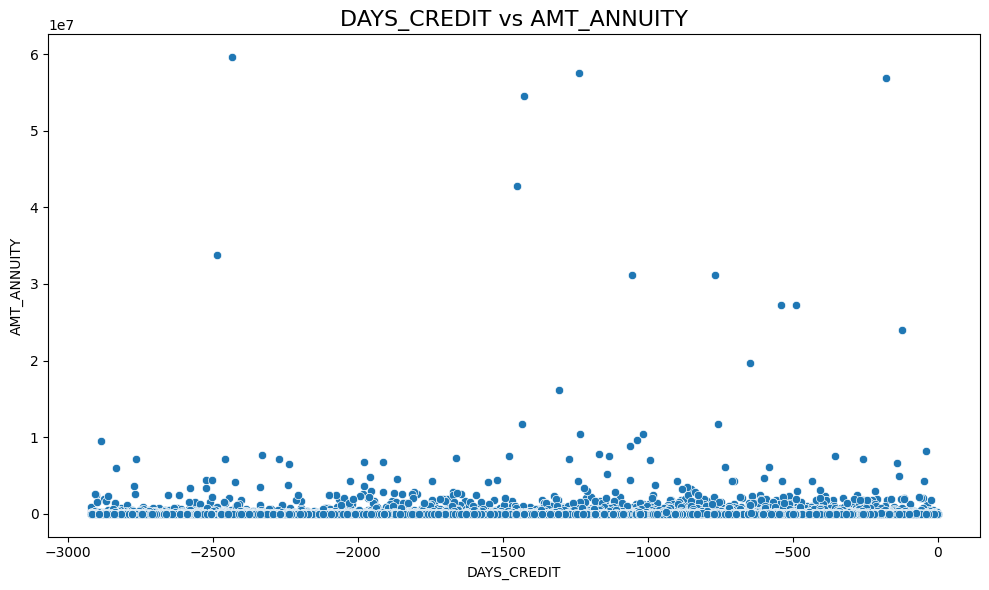

In [66]:
# Mối quan hệ giữa "DAYS_CREDIT" và "AMT_ANNUITY"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DAYS_CREDIT', y='AMT_ANNUITY', data=bureau)
plt.title('DAYS_CREDIT vs AMT_ANNUITY', fontsize=16)
plt.tight_layout()
plt.show()

In [67]:
# Kiểm tra số lượng khách hàng duy nhất
print(f"Unique SK_ID_CURR: {bureau['SK_ID_CURR'].nunique()}")

Unique SK_ID_CURR: 263491


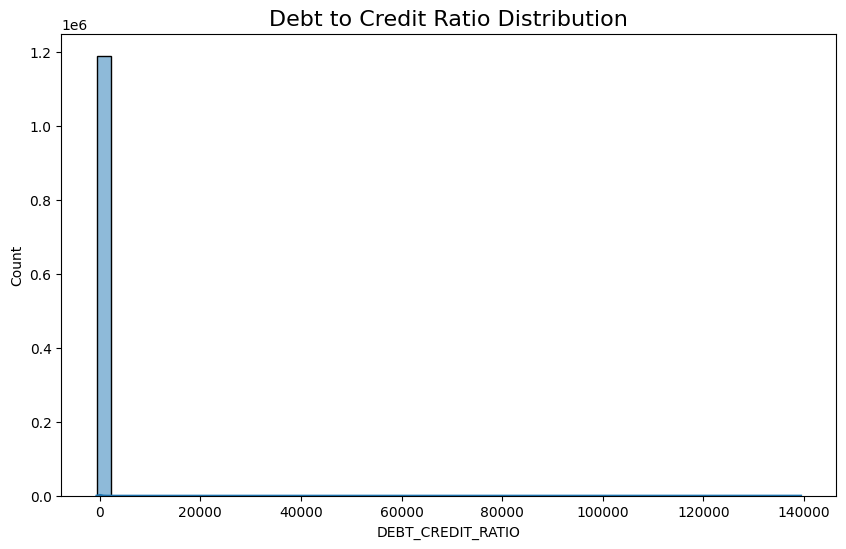

In [68]:
# Tính tỷ lệ nợ/tín dụng
bureau['DEBT_CREDIT_RATIO'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['AMT_CREDIT_SUM']
plt.figure(figsize=(10, 6))
sns.histplot(bureau['DEBT_CREDIT_RATIO'], kde=True, bins=50)
plt.title('Debt to Credit Ratio Distribution', fontsize=16)
plt.show()

### 2.4 bureau_balance

In [69]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [70]:
bureau_balance.columns.values

array(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype=object)

In [71]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [72]:
bureau_balance.describe()

,SK_ID_BUREAU,MONTHS_BALANCE
count,2.729992e+07,2.729992e+07
mean,6.036297e+06,-3.074169e+01
std,4.923489e+05,2.386451e+01
min,5.001709e+06,-9.600000e+01
25%,5.730933e+06,-4.600000e+01
50%,6.070821e+06,-2.500000e+01
75%,6.431951e+06,-1.100000e+01
max,6.842888e+06,0.000000e+00


In [73]:
find_missing(bureau_balance).head(12)

,missing_count,missing_ratio
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


In [74]:
# Tần suất các giá trị trong cột STATUS
bureau_balance['STATUS'].value_counts() # Phân phối giá trị trong cột 'STATUS'



,count
STATUS,
C,13646993
0,7499507
X,5810482
1,242347
5,62406
2,23419
3,8924
4,5847


In [75]:
# Check sự phân bố của 'MONTHS_BALANCE' (số tháng tín dụng)
bureau_balance['MONTHS_BALANCE'].describe()  # Thống kê phân bố cột 'MONTHS_BALANCE'


,MONTHS_BALANCE
count,2.729992e+07
mean,-3.074169e+01
std,2.386451e+01
min,-9.600000e+01
25%,-4.600000e+01
50%,-2.500000e+01
75%,-1.100000e+01
max,0.000000e+00


### 2.5 credit_card_balance

In [76]:
credit_card_balance.head()

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.0,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0,87788
1,2582071,-82,16809.210,67500,0.0,0.0,0.0,0.0,3375.0,9000.0,9000.0,15488.685,16809.210,16809.210,0.0,0,0.0,0.0,18.0,Active,0,0,87788
2,2582071,-84,27577.890,67500,0.0,0.0,0.0,0.0,3375.0,4500.0,4500.0,26125.020,27577.890,27577.890,0.0,0,0.0,0.0,16.0,Active,0,0,87788
3,2582071,-7,65159.235,45000,0.0,0.0,0.0,0.0,2250.0,2250.0,2250.0,60301.170,65609.235,65609.235,0.0,0,0.0,0.0,63.0,Active,0,0,87788
4,2582071,-59,70475.850,67500,24750.0,24750.0,0.0,0.0,3375.0,4500.0,4500.0,63975.015,70475.850,70475.850,4.0,4,0.0,0.0,41.0,Active,0,0,87788


In [77]:
credit_card_balance.columns.values

array(['SK_ID_PREV', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF', 'SK_ID_CURR'],
      dtype=object)

In [78]:
find_missing(credit_card_balance).head(12)

,missing_count,missing_ratio
SK_ID_PREV,0,0.000000
MONTHS_BALANCE,0,0.000000
AMT_BALANCE,0,0.000000
AMT_CREDIT_LIMIT_ACTUAL,0,0.000000
AMT_DRAWINGS_ATM_CURRENT,605754,0.187658
AMT_DRAWINGS_CURRENT,0,0.000000
AMT_DRAWINGS_OTHER_CURRENT,605754,0.187658
AMT_DRAWINGS_POS_CURRENT,605754,0.187658
AMT_INST_MIN_REGULARITY,264384,0.081904
AMT_PAYMENT_CURRENT,620093,0.192100


### 2.6 previous_application

In [79]:
previous_application.head()

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,293189
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,1,0.101325,NaN,NaN,XAP,Refused,-472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,1,0.000000,NaN,NaN,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,293189
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,91587
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,91587


In [80]:
previous_application.columns.values

array(['SK_ID_PREV', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'SK_ID_CURR'], dtype=object)

In [81]:
previous_application.describe()

,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
count,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,4791.000000,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,1.413701e+06
mean,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,6.655317e+03,2.264512e+05,1.247893e+01,9.964321e-01,0.080175,0.189436,0.771284,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572,1.537647e+05
std,5.327153e+05,1.472491e+04,2.936222e+05,3.194813e+05,2.062030e+04,3.159376e+05,3.331474e+00,5.962560e-02,0.107784,0.090849,0.100644,7.835402e+02,7.695082e+03,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419,8.867392e+04
min,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000,0.000000e+00
25%,1.461346e+06,6.257858e+03,1.975050e+04,2.488050e+04,0.000000e+00,4.982850e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000,7.692000e+04
50%,1.922698e+06,1.122376e+04,7.087050e+04,8.059500e+04,1.791000e+03,1.102455e+05,1.200000e+01,1.000000e+00,0.062489,0.189136,0.835095,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000,1.536860e+05
75%,2.384012e+06,2.042078e+04,1.800000e+05,2.156400e+05,7.695000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108912,0.193330,0.852537,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000,2.305300e+05
max,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000,3.075100e+05


In [82]:
previous_application.dtypes

,0
SK_ID_PREV,int64
NAME_CONTRACT_TYPE,object
AMT_ANNUITY,float64
AMT_APPLICATION,float64
AMT_CREDIT,float64
AMT_DOWN_PAYMENT,float64
AMT_GOODS_PRICE,float64
WEEKDAY_APPR_PROCESS_START,object
HOUR_APPR_PROCESS_START,int64
FLAG_LAST_APPL_PER_CONTRACT,object


In [83]:
find_missing(previous_application).head(12)

,missing_count,missing_ratio
SK_ID_PREV,0,0.000000e+00
NAME_CONTRACT_TYPE,0,0.000000e+00
AMT_ANNUITY,307218,2.173147e-01
AMT_APPLICATION,0,0.000000e+00
AMT_CREDIT,1,7.073632e-07
AMT_DOWN_PAYMENT,749540,5.301970e-01
AMT_GOODS_PRICE,319525,2.260202e-01
WEEKDAY_APPR_PROCESS_START,0,0.000000e+00
HOUR_APPR_PROCESS_START,0,0.000000e+00
FLAG_LAST_APPL_PER_CONTRACT,0,0.000000e+00


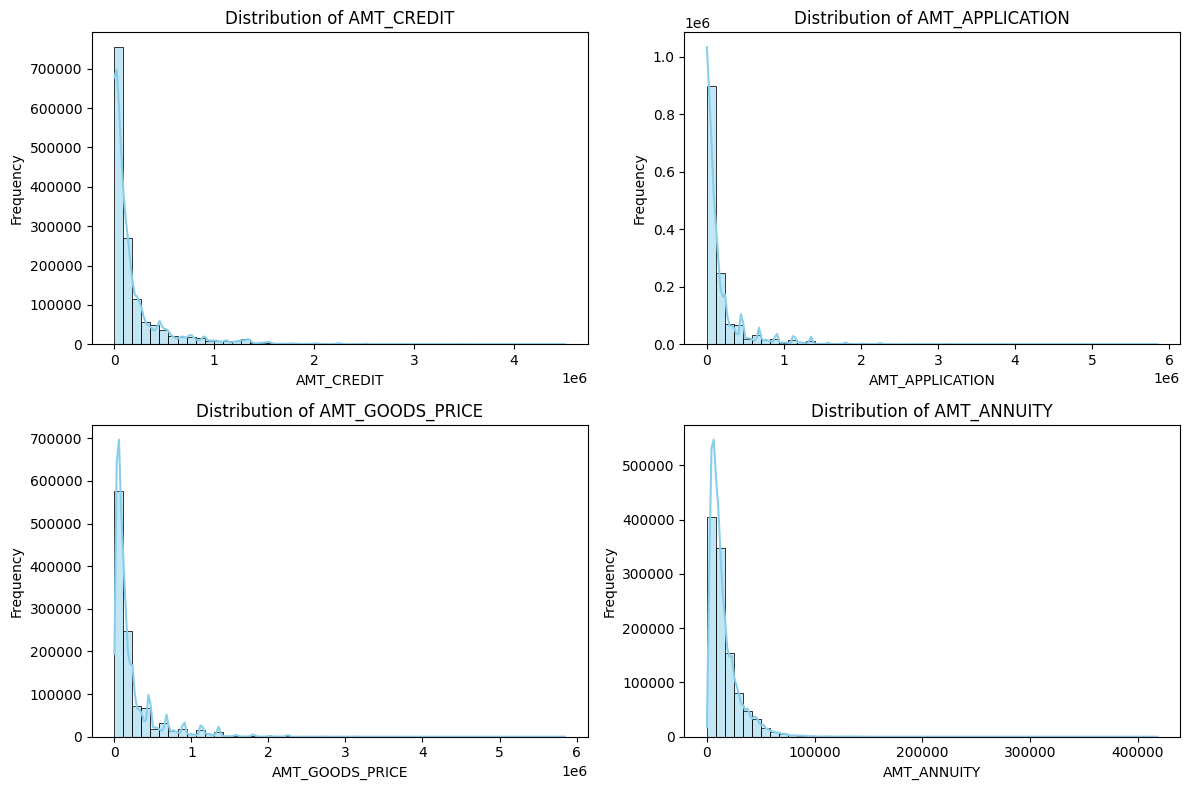

In [84]:
# Vẽ biểu đồ phân phối cho các cột số quan trọng như 'AMT_CREDIT', 'AMT_APPLICATION', 'AMT_GOODS_PRICE', 'AMT_ANNUITY'
num_columns = ['AMT_CREDIT', 'AMT_APPLICATION', 'AMT_GOODS_PRICE', 'AMT_ANNUITY']
plt.figure(figsize=(12, 8))

for i, col in enumerate(num_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(previous_application[col], kde=True, bins=50, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

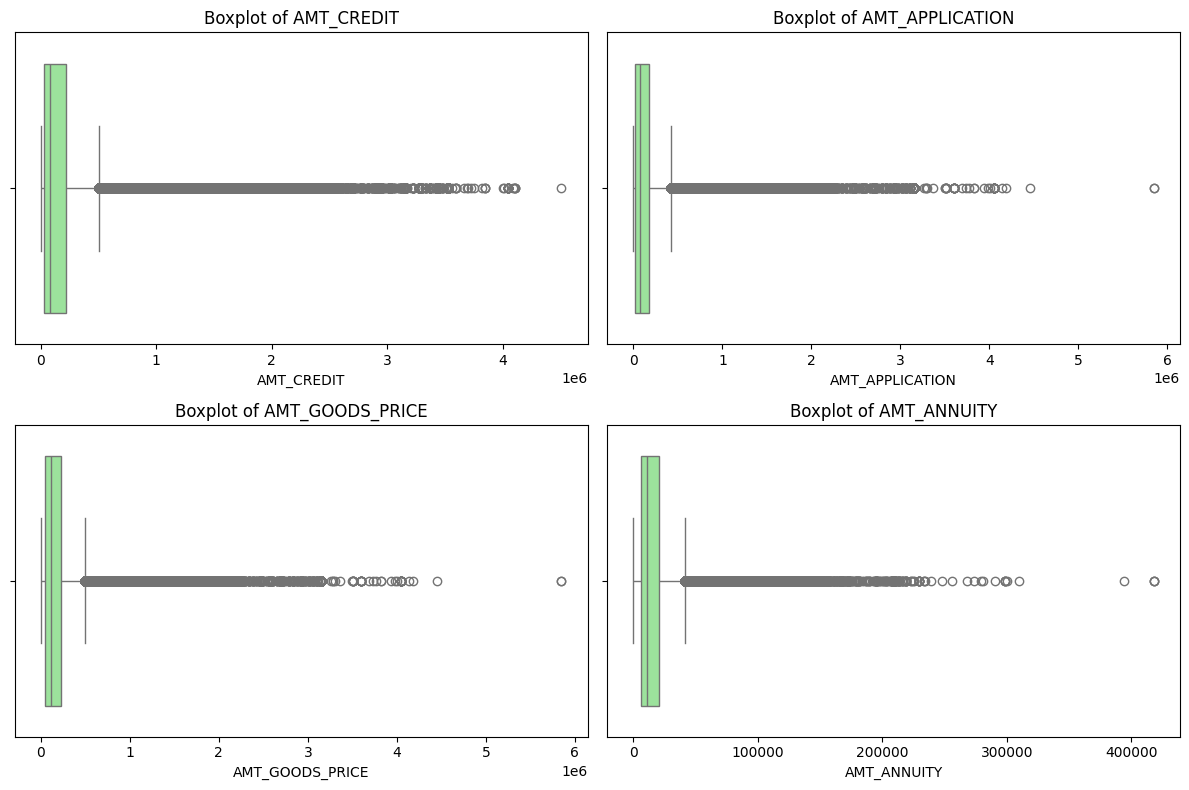

In [85]:
# check sự phân phối của các giá trị trong các cột trên (sd biểu đồ boxplot)
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=previous_application[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

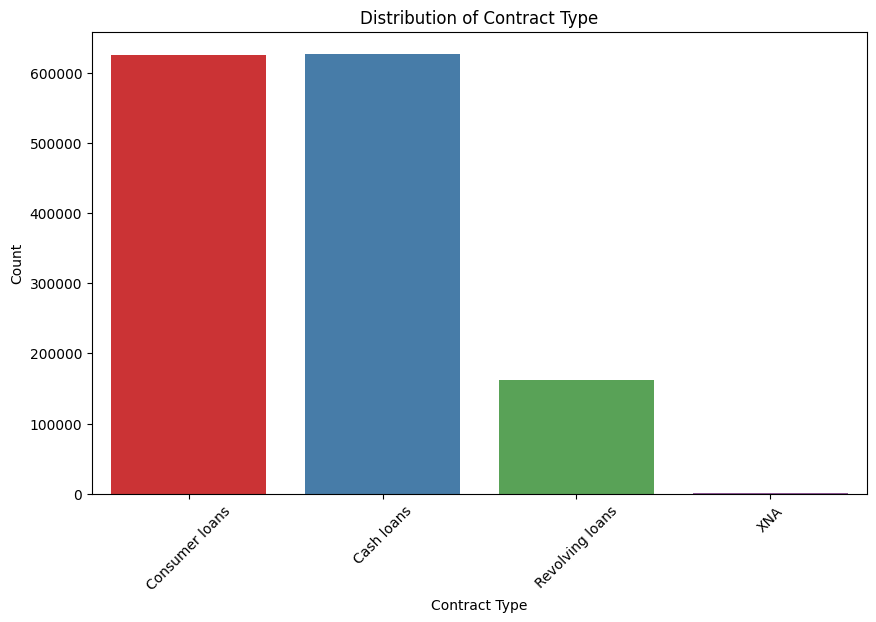

In [86]:
# phân tích theo loại hợp đồng (Contract Type)
plt.figure(figsize=(10, 6))
sns.countplot(x='NAME_CONTRACT_TYPE', data=previous_application, palette='Set1')
plt.title('Distribution of Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

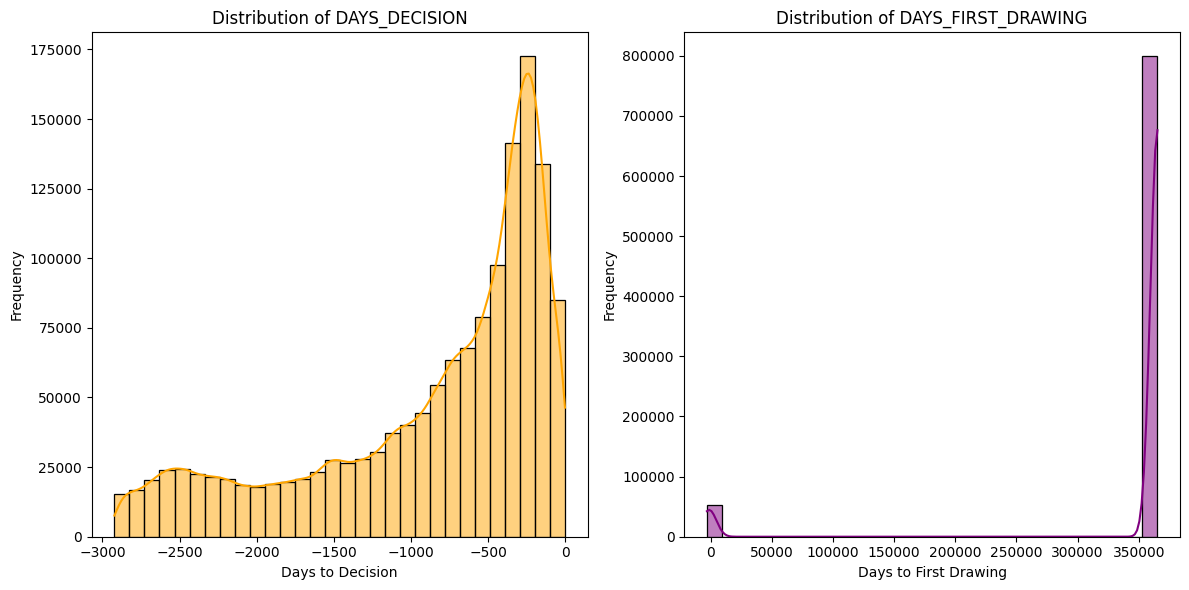

In [87]:
# 7. Phân tích các cột ngày tháng: DAYS_DECISION, DAYS_FIRST_DRAWING
plt.figure(figsize=(12, 6))

# DAYS_DECISION
plt.subplot(1, 2, 1)
sns.histplot(previous_application['DAYS_DECISION'], kde=True, bins=30, color='orange')
plt.title('Distribution of DAYS_DECISION')
plt.xlabel('Days to Decision')
plt.ylabel('Frequency')

# DAYS_FIRST_DRAWING
plt.subplot(1, 2, 2)
sns.histplot(previous_application['DAYS_FIRST_DRAWING'], kde=True, bins=30, color='purple')
plt.title('Distribution of DAYS_FIRST_DRAWING')
plt.xlabel('Days to First Drawing')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

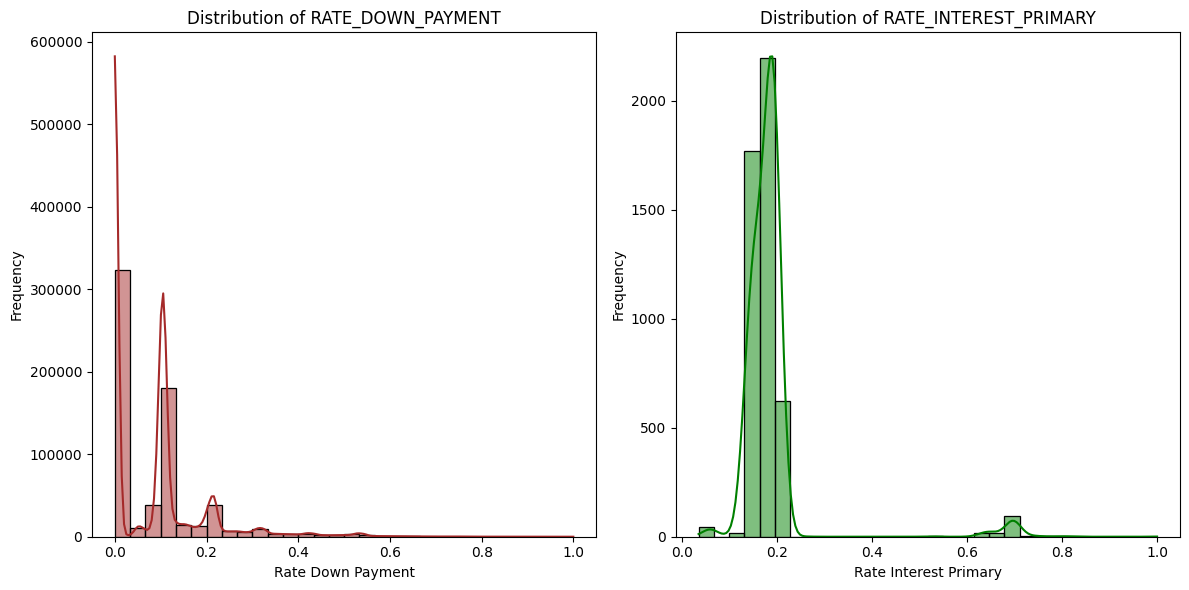

In [88]:
# phân tích các cột tỷ lệ (RATE_DOWN_PAYMENT và RATE_INTEREST_PRIMARY...)
plt.figure(figsize=(12, 6))

# RATE_DOWN_PAYMENT
plt.subplot(1, 2, 1)
sns.histplot(previous_application['RATE_DOWN_PAYMENT'], kde=True, bins=30, color='brown')
plt.title('Distribution of RATE_DOWN_PAYMENT')
plt.xlabel('Rate Down Payment')
plt.ylabel('Frequency')

# RATE_INTEREST_PRIMARY
plt.subplot(1, 2, 2)
sns.histplot(previous_application['RATE_INTEREST_PRIMARY'], kde=True, bins=30, color='green')
plt.title('Distribution of RATE_INTEREST_PRIMARY')
plt.xlabel('Rate Interest Primary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

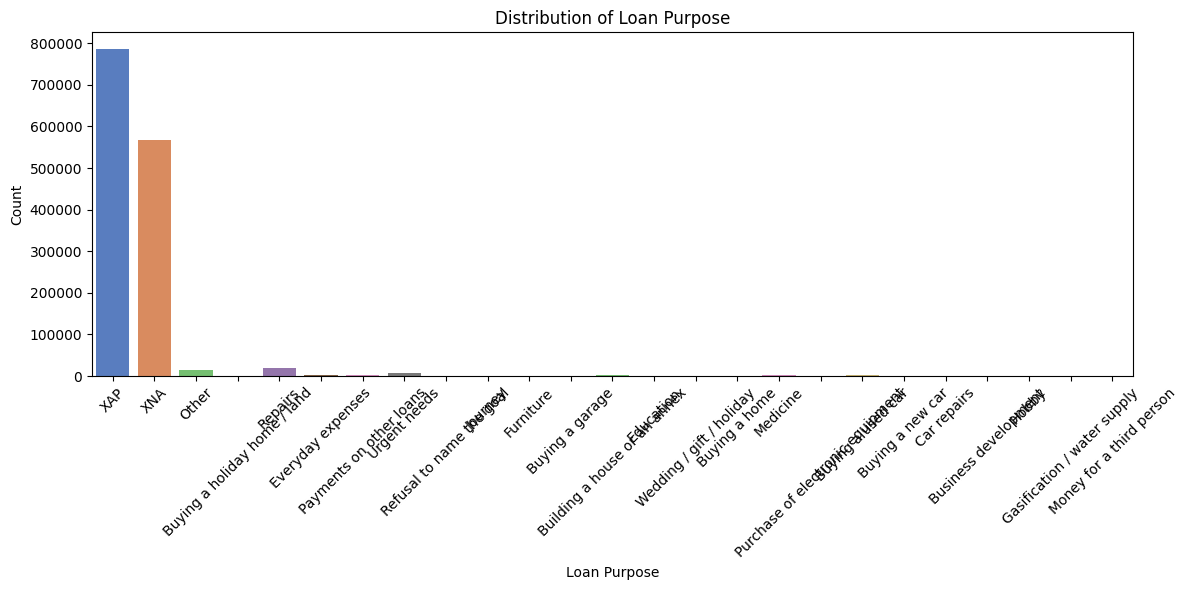

In [89]:
# check sự phân bố theo từng loại mục đích tiền vay (Loan Purpose)
plt.figure(figsize=(12, 6))
sns.countplot(x='NAME_CASH_LOAN_PURPOSE', data=previous_application, palette='muted')
plt.title('Distribution of Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2.7 installments_payments

In [90]:
installments_payments.head()

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,SK_ID_CURR
0,1054186,1.0,6,-1180.0,-1187.0,6948.360,6948.360,147397.0
1,2452854,1.0,21,-546.0,-552.0,11302.605,11302.605,147397.0
2,1054186,1.0,2,-1300.0,-1307.0,6948.360,6948.360,147397.0
3,1682318,1.0,2,-240.0,-243.0,7374.510,7374.510,147397.0
4,2452854,1.0,10,-876.0,-882.0,11302.605,11302.605,147397.0


In [91]:
installments_payments.columns.values

array(['SK_ID_PREV', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER',
       'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT', 'AMT_INSTALMENT',
       'AMT_PAYMENT', 'SK_ID_CURR'], dtype=object)

In [92]:
find_missing(installments_payments).head(12)

,missing_count,missing_ratio
SK_ID_PREV,0,0.000000e+00
NUM_INSTALMENT_VERSION,0,0.000000e+00
NUM_INSTALMENT_NUMBER,0,0.000000e+00
DAYS_INSTALMENT,0,0.000000e+00
DAYS_ENTRY_PAYMENT,1639,2.116270e-04
AMT_INSTALMENT,1,1.291196e-07
AMT_PAYMENT,1639,2.116270e-04
SK_ID_CURR,1,1.291196e-07


## <a id='3'>3. Explore the data</a>

### <a id='3-1'>3.1 Categorical features</a>
#### Label

In [93]:
features = ["OCCUPATION_TYPE",'CODE_GENDER','NAME_INCOME_TYPE','NAME_HOUSING_TYPE']
def convert_cat(df, features):
  for feature in features:
    df[feature] = df[feature].astype('category')
convert_cat(application_train, features)
convert_cat(application_test, features)

In [94]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246009 entries, 0 to 246008
Columns: 123 entries, Unnamed: 0 to SK_ID_CURR
dtypes: category(4), float64(65), int64(42), object(12)
memory usage: 224.3+ MB


In [95]:
application_train.describe()

,Unnamed: 0,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
count,246009.000000,246009.000000,246009.000000,2.460090e+05,2.460090e+05,245999.000000,2.457850e+05,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,83821.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246008.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,107484.000000,2.454800e+05,197185.000000,121025.000000,101993.000000,125927.000000,82325.000000,74079.000000,114800.000000,122060.000000,123476.000000,79054.000000,99879.000000,77812.000000,122421.000000,75140.000000,110065.000000,121025.000000,101993.000000,125927.000000,82325.000000,74079.000000,114800.000000,122060.000000,123476.000000,79054.000000,99879.000000,77812.000000,122421.000000,75140.000000,110065.000000,121025.000000,101993.000000,125927.000000,82325.000000,74079.000000,114800.000000,122060.000000,123476.000000,79054.000000,99879.000000,77812.000000,122421.000000,75140.000000,110065.000000,127190.000000,245204.000000,245204.000000,245204.000000,245204.000000,246008.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,246009.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,246009.000000
mean,123004.000000,0.080794,0.416229,1.684589e+05,5.996410e+05,27120.238129,5.389827e+05,0.020855,-16038.946343,63852.612441,-4985.222248,-2992.974509,12.042293,0.999996,0.819787,0.198928,0.998114,0.280665,0.056961,2.152637,2.052616,2.031682,12.063372,0.015227,0.050921,0.040686,0.078363,0.230142,0.179148,0.502462,5.143854e-01,0.511034,0.117422,0.088463,0.977713,0.752876,0.044533,0.079023,0.149660,0.226512,0.232112,0.066439,0.100839,0.107483,0.008882,0.028339,0.114131,0.087532,0.977049,0.760014,0.042453,0.074538,0.145133,0.222510,0.228227,0.065007,0.105644,0.105985,0.008141,0.026954,0

In [96]:
application_train.describe(include=['category'])

,CODE_GENDER,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,246009,246009,246009,168903
unique,3,8,6,18
top,F,Working,House / apartment,Laborers
freq,161856,126930,218389,44202


In [97]:
application_train.TARGET.value_counts().to_frame()

,count
TARGET,
0,226133
1,19876


In [98]:
application_train.TARGET.value_counts(normalize=True).to_frame()

,proportion
TARGET,
0,0.919206
1,0.080794


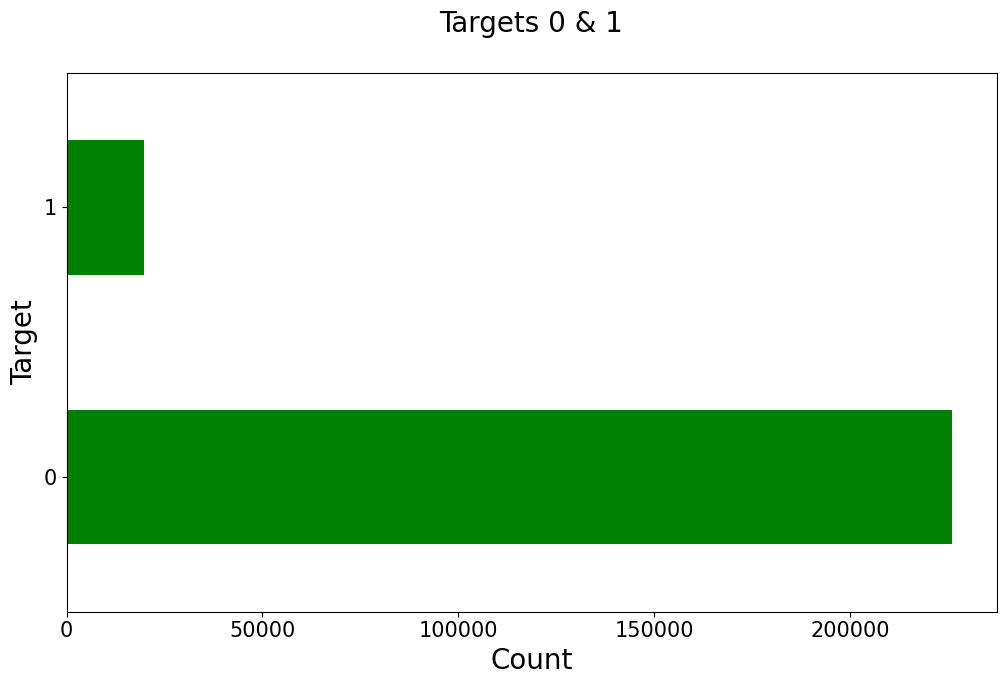

In [99]:
# Plotting for the Targets

plt.figure(figsize=[12,7])

application_train.TARGET.value_counts().plot.barh(color='Green')

plt.title('Targets 0 & 1\n', fontsize=20)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Target', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [100]:
# Checking the imbalance ratio for the Target column

target_0 = application_train.loc[application_train["TARGET"]==0]
target_1 = application_train.loc[application_train["TARGET"]==1]

round(len(target_0)/len(target_1),2)

11.38

In [101]:
def plot_categorical(data, col, size=[8 ,4], xlabel_angle=0, title='', xtick=None, xlabel=None, ylabel=None):
    '''use this for ploting the count of categorical features'''
    plotdata = data[col].value_counts() / len(data)
    plt.figure(figsize = size)
    sns.barplot(x = plotdata.index, y=plotdata.values)

    # Only set xticks if xtick is provided and its length matches the number of categories
    if xtick is not None and len(xtick) == len(plotdata.index):
        plt.xticks(plotdata.index, xtick)

    plt.xlabel(col if xlabel is None else xlabel) # Use column name as xlabel if not provided
    plt.title(title)
    if xlabel_angle!=0:
        plt.xticks(rotation=xlabel_angle)
    plt.show()

### Occupation Type

In [102]:
application_train['OCCUPATION_TYPE'].value_counts().to_frame()


,count
OCCUPATION_TYPE,
Laborers,44202
Sales staff,25622
Core staff,22042
Managers,17165
Drivers,14886
High skill tech staff,9180
Accountants,7848
Medicine staff,6817
Security staff,5375


In [103]:
application_train['OCCUPATION_TYPE'].value_counts(normalize=True).to_frame()


,proportion
OCCUPATION_TYPE,
Laborers,0.261701
Sales staff,0.151697
Core staff,0.130501
Managers,0.101626
Drivers,0.088133
High skill tech staff,0.054351
Accountants,0.046465
Medicine staff,0.040360
Security staff,0.031823


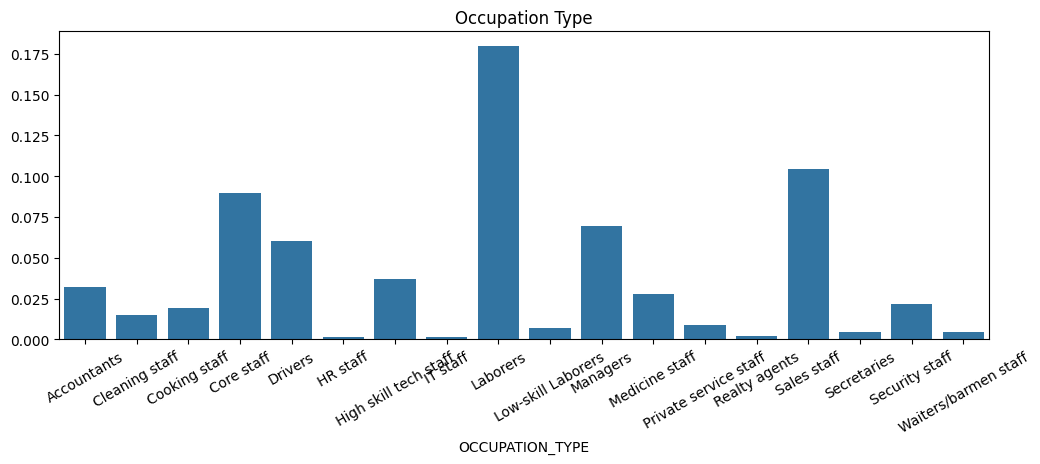

In [104]:
plot_categorical(data=application_train, col='OCCUPATION_TYPE', size=[12 ,4], xlabel_angle=30, title='Occupation Type')

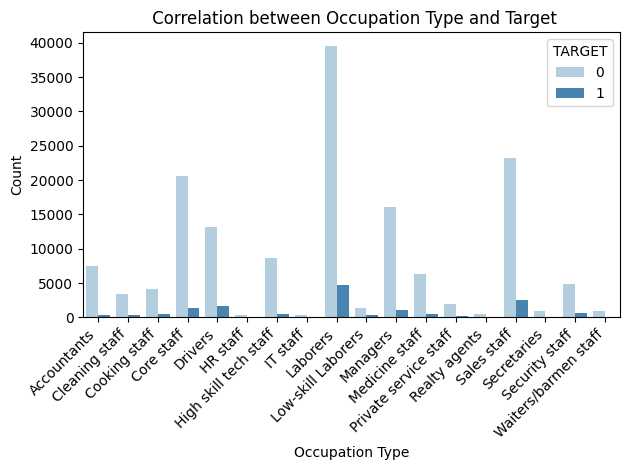

In [105]:

# Vẽ biểu đồ
sns.countplot(data=application_train, x='OCCUPATION_TYPE', hue='TARGET', palette='Blues')

# Xoay nhãn trục x để không bị đè
plt.xticks(rotation=45, ha='right')  # Xoay 45 độ và căn phải

# Thêm tiêu đề và nhãn cho trục
plt.title(' Correlation between Occupation Type and Target')
plt.xlabel('Occupation Type')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.tight_layout()  # Đảm bảo tất cả nội dung biểu đồ vừa vặn
plt.show()


#### Gender

In [106]:
application_train['CODE_GENDER'].value_counts().to_frame()


,count
CODE_GENDER,
F,161856
M,84150
XNA,3


In [107]:
application_train['CODE_GENDER'].value_counts(normalize=True).to_frame()


,proportion
CODE_GENDER,
F,0.657927
M,0.342061
XNA,0.000012


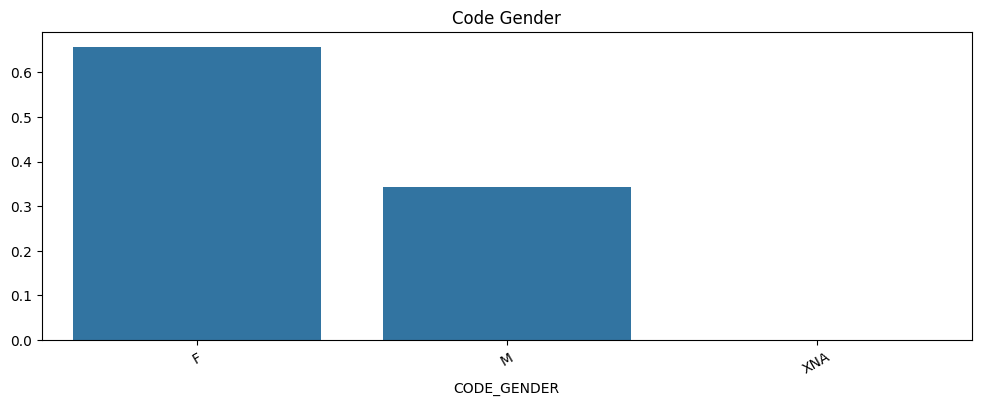

In [108]:
plot_categorical(data=application_train, col='CODE_GENDER', size=[12 ,4], xlabel_angle=30, title='Code Gender')

<Axes: xlabel='CODE_GENDER', ylabel='count'>

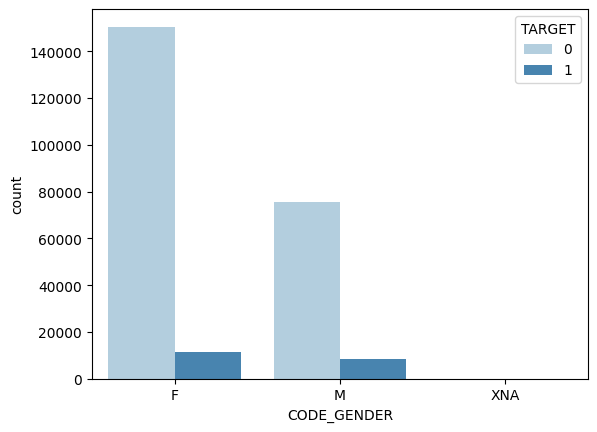

In [109]:
# mối tương quan giữa giới tính và biến Target
sns.countplot(data=application_train, x = 'CODE_GENDER', hue = 'TARGET', palette= 'Blues')

### Income Type

In [110]:
application_train['NAME_INCOME_TYPE'].value_counts().to_frame()


,count
NAME_INCOME_TYPE,
Working,126930
Commercial associate,57339
Pensioner,44314
State servant,17381
Unemployed,19
Student,15
Businessman,9
Maternity leave,2


In [111]:
application_train['NAME_INCOME_TYPE'].value_counts(normalize=True).to_frame()


,proportion
NAME_INCOME_TYPE,
Working,0.515957
Commercial associate,0.233077
Pensioner,0.180132
State servant,0.070652
Unemployed,0.000077
Student,0.000061
Businessman,0.000037
Maternity leave,0.000008


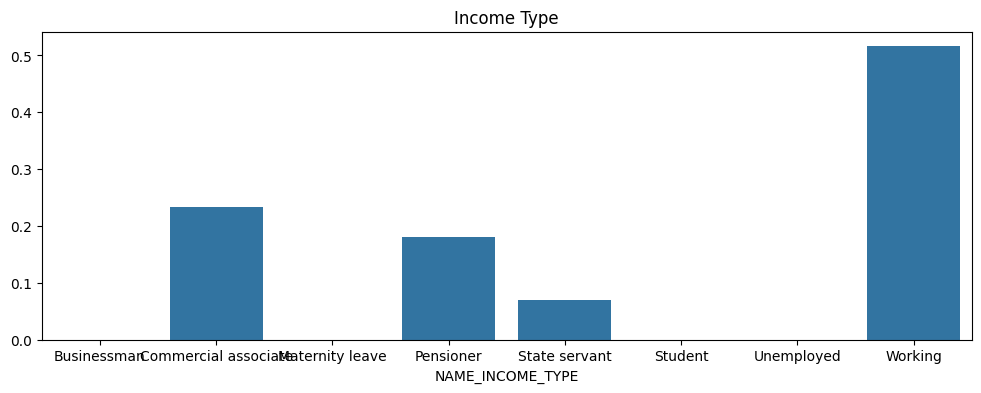

<Figure size 640x480 with 0 Axes>

In [112]:
plot_categorical(data=application_train, col='NAME_INCOME_TYPE', size=[12 ,4], xlabel_angle=0, title='Income Type')
plt.tight_layout()

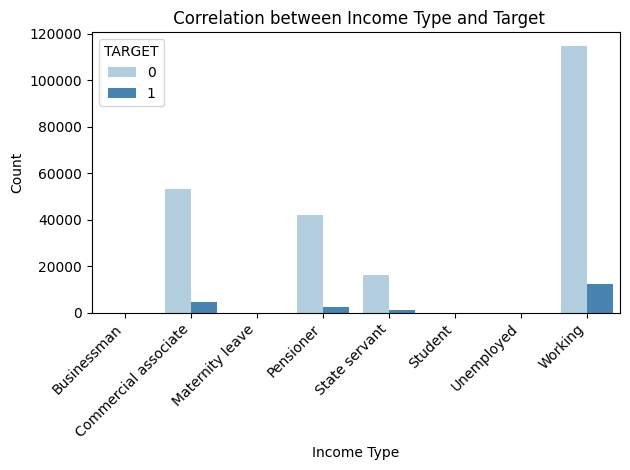

In [113]:
# mối tương quan giữa thu nhập và biến mục tiêu
sns.countplot(data=application_train, x = 'NAME_INCOME_TYPE', hue = 'TARGET', palette= 'Blues')

# Xoay nhãn trục x để không bị đè
plt.xticks(rotation=45, ha='right')  # Xoay 45 độ và căn phải

# Thêm tiêu đề và nhãn cho trục
plt.title(' Correlation between Income Type and Target')
plt.xlabel('Income Type')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.tight_layout()  # Đảm bảo tất cả nội dung biểu đồ vừa vặn
plt.show()


### House Type

In [114]:
application_train['NAME_HOUSING_TYPE'].value_counts().to_frame()


,count
NAME_HOUSING_TYPE,
House / apartment,218389
With parents,11838
Municipal apartment,8866
Rented apartment,3916
Office apartment,2093
Co-op apartment,907


In [115]:
application_train['NAME_HOUSING_TYPE'].value_counts(normalize=True).to_frame()


,proportion
NAME_HOUSING_TYPE,
House / apartment,0.887728
With parents,0.048120
Municipal apartment,0.036039
Rented apartment,0.015918
Office apartment,0.008508
Co-op apartment,0.003687


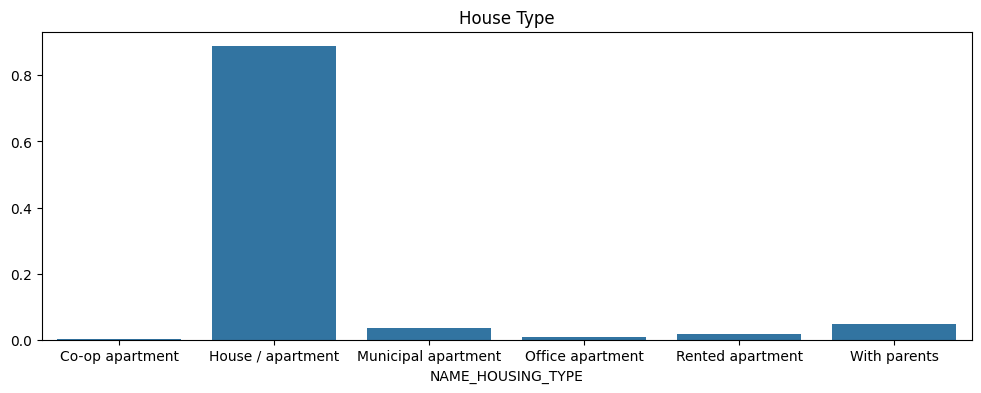

In [116]:
plot_categorical(data=application_train, col='NAME_HOUSING_TYPE', size=[12 ,4], xlabel_angle=0, title='House Type')

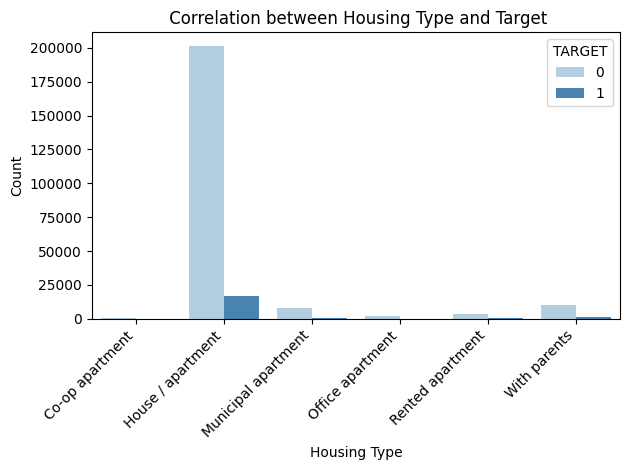

In [117]:
# mối tương quan giữa kiểu nhà ở và biến mục tiêu
sns.countplot(data=application_train, x = 'NAME_HOUSING_TYPE', hue = 'TARGET', palette= 'Blues')

# Xoay nhãn trục x để không bị đè
plt.xticks(rotation=45, ha='right')  # Xoay 45 độ và căn phải

# Thêm tiêu đề và nhãn cho trục
plt.title(' Correlation between Housing Type and Target')
plt.xlabel('Housing Type')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.tight_layout()  # Đảm bảo tất cả nội dung biểu đồ vừa vặn
plt.show()


### <a id='3-2'>3.2 Numerical features</a>
#### Credit Amount

In [118]:
def plot_numerical(data, col, size=[8, 4], bins=50):
    '''use this for ploting the distribution of numercial features'''
    plt.figure(figsize=size)
    plt.title("Distribution of %s" % col)
    sns.distplot(data[col].dropna(), kde=True,bins=bins)
    plt.show()

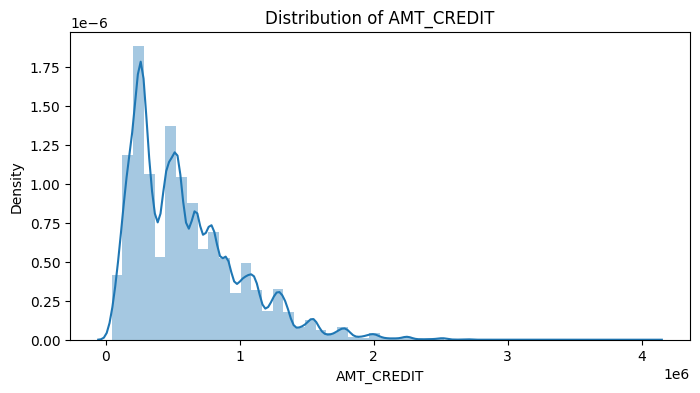

In [119]:
plot_numerical(application_train, 'AMT_CREDIT')

Text(0.5, 1.0, 'Correlation AMT_CREDIT and Target')

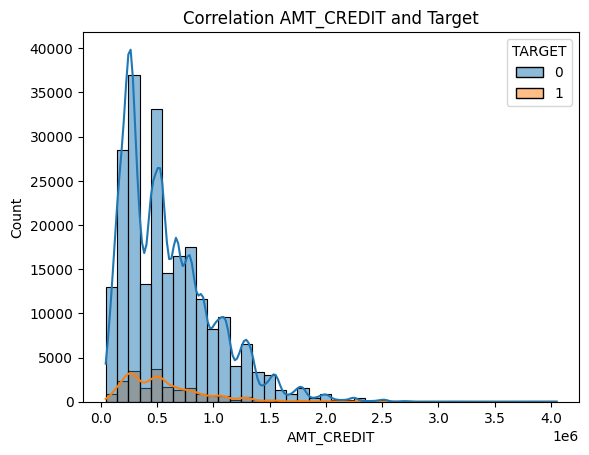

In [120]:
# Sự tương quan giữa AMT_CREDIT và Target
sns.histplot(data=application_train, x= 'AMT_CREDIT', hue = 'TARGET', bins = 40, kde=True)
plt.title("Correlation AMT_CREDIT and Target")


#### Annuity Amount

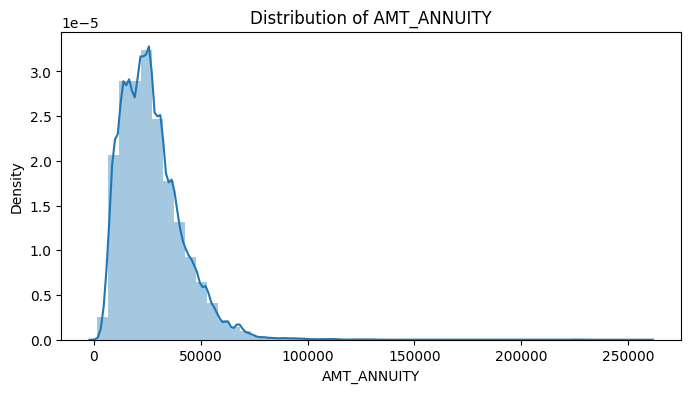

In [121]:
plot_numerical(application_train, 'AMT_ANNUITY')

Text(0.5, 1.0, 'Correlation AMT_ANNUITY and Target')

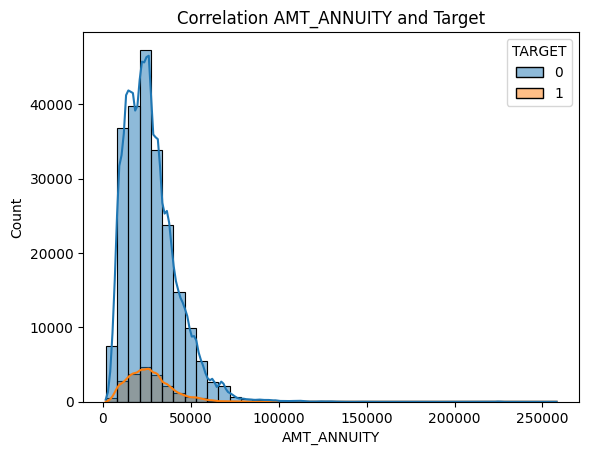

In [122]:
sns.histplot(data=application_train, x= 'AMT_ANNUITY', hue = 'TARGET', bins = 40, kde=True)
plt.title("Correlation AMT_ANNUITY and Target")


### Days employed

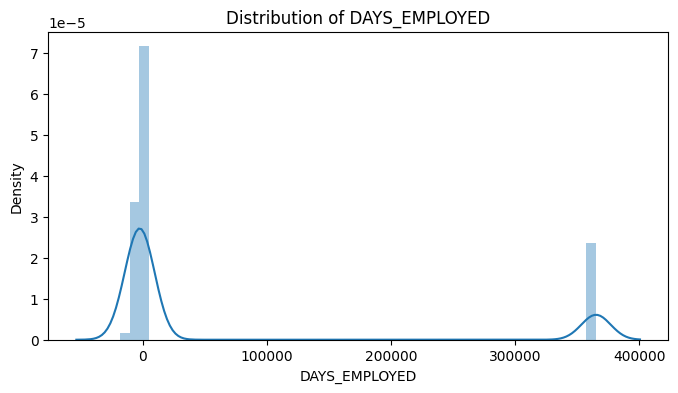

In [123]:
plot_numerical(application_train, 'DAYS_EMPLOYED')

Text(0.5, 1.0, 'Correlation DAYS_EMPLOYED and Target')

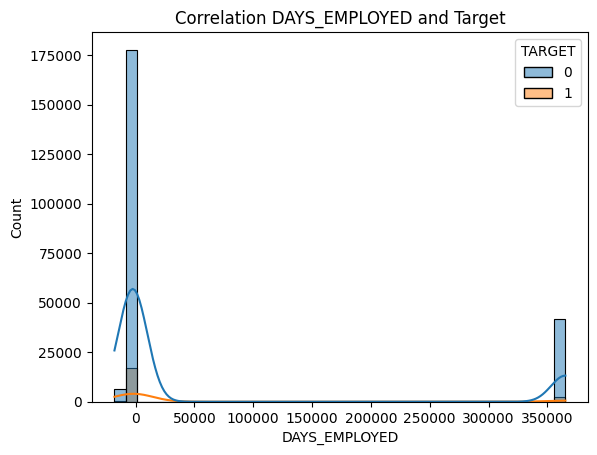

In [124]:
sns.histplot(data=application_train, x= 'DAYS_EMPLOYED', hue = 'TARGET', bins = 40, kde=True)
plt.title("Correlation DAYS_EMPLOYED and Target")

### <a id='3-3'>3.3 Categorical features by label</a>
#### Gender

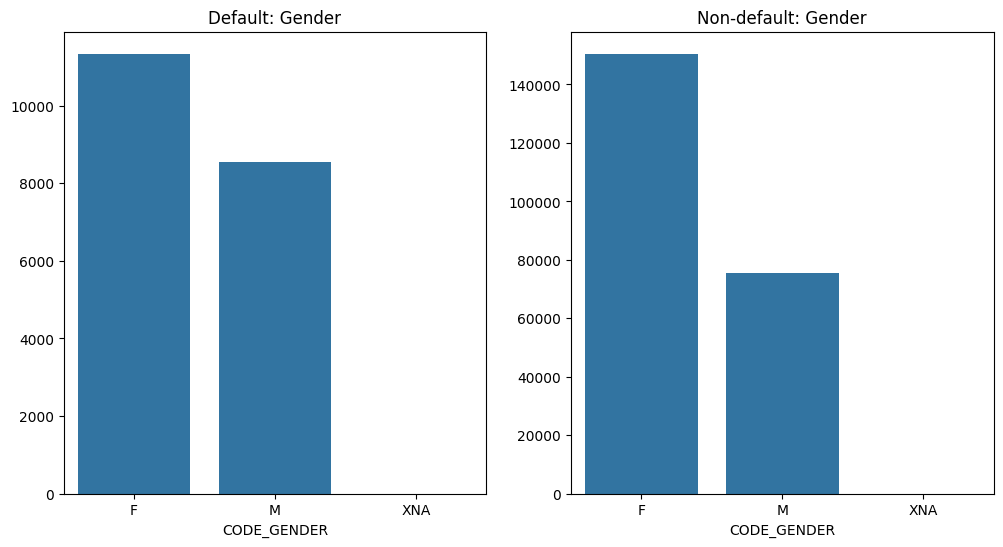

In [125]:
def plot_categorical_bylabel(data, col, size=[12 ,6], xlabel_angle=0, title=''):
    '''use it to compare the distribution between label 1 and label 0'''
    plt.figure(figsize = size)
    l1 = data.loc[data.TARGET==1, col].value_counts()
    l0 = data.loc[data.TARGET==0, col].value_counts()
    plt.subplot(1,2,1)
    sns.barplot(x = l1.index, y=l1.values)
    plt.title('Default: '+title)
    plt.xticks(rotation=xlabel_angle)
    plt.subplot(1,2,2)
    sns.barplot(x = l0.index, y=l0.values)
    plt.title('Non-default: '+title)
    plt.xticks(rotation=xlabel_angle)
    plt.show()
plot_categorical_bylabel(application_train, 'CODE_GENDER', title='Gender')

#### Education Type

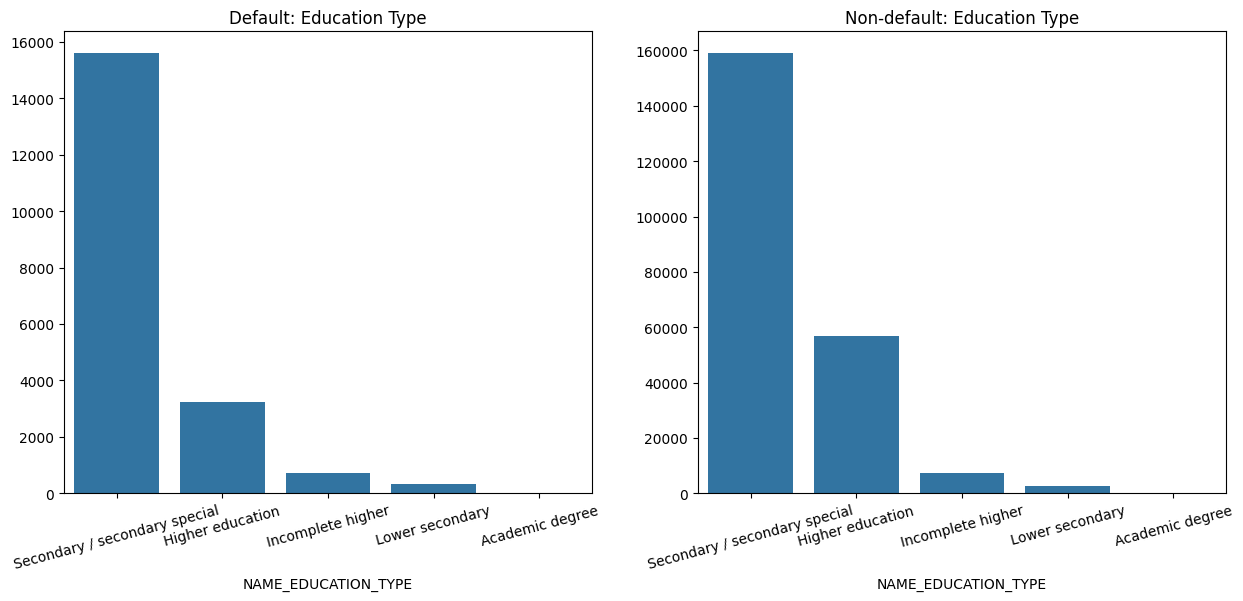

In [126]:
plot_categorical_bylabel(application_train, 'NAME_EDUCATION_TYPE', size=[15 ,6], xlabel_angle=15, title='Education Type')

### <a id='3-4'>3.4 Numerical features by label</a>
#### EXT_SOURCE_1

In [127]:
def plot_numerical_bylabel(data, col, size=[12, 6]):
    plt.figure(figsize=size)
    # correlation coefficient between the new variable and the target
    corr = data['TARGET'].corr(data[col])

    # Calculate medians for repaid vs not repaid
    # Use .loc instead of .ix for label-based indexing
    avg_repaid = data.loc[data['TARGET'] == 0, col].median()
    avg_not_repaid = data.loc[data['TARGET'] == 1, col].median()

    plt.figure(figsize = (12, 6))

    # Plot the distribution for target == 0 and target == 1
    # Use .loc instead of .ix for label-based indexing
    sns.kdeplot(data.loc[data['TARGET'] == 0, col], label = 'TARGET == 0')
    sns.kdeplot(data.loc[data['TARGET'] == 1, col], label = 'TARGET == 1')

    # label the plot
    plt.xlabel(col); plt.ylabel('Density'); plt.title('%s Distribution' % col)
    plt.legend();
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (col, corr))
    # Print out average values
    print(f"Average value for repaid: {avg_repaid}")
    print(f"Average value for not repaid: {avg_not_repaid}")


The correlation between EXT_SOURCE_1 and the TARGET is -0.1541
Average value for repaid: 0.5180231912160609
Average value for not repaid: 0.3644380214987789


<Figure size 1200x600 with 0 Axes>

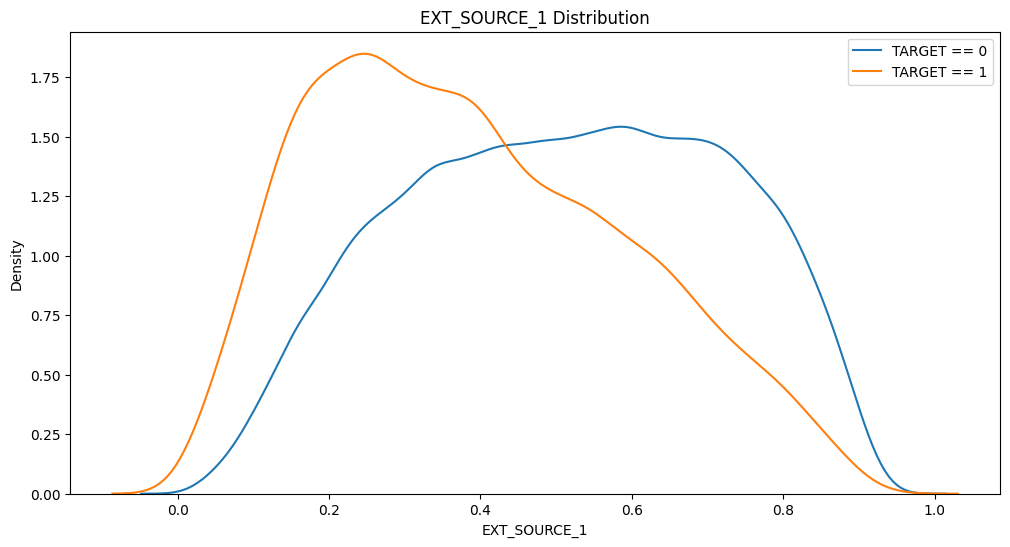

In [128]:
plot_numerical_bylabel(application_train, 'EXT_SOURCE_1')

#### EXT_SOURCE_2

The correlation between EXT_SOURCE_2 and the TARGET is -0.1588
Average value for repaid: 0.5738672542803406
Average value for not repaid: 0.441073254038219


<Figure size 1200x600 with 0 Axes>

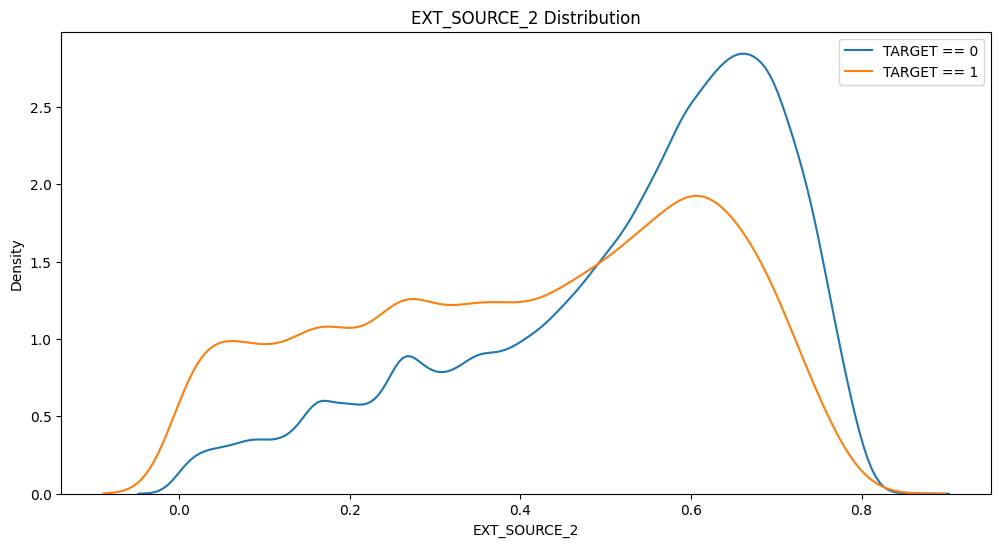

In [129]:
plot_numerical_bylabel(application_train, 'EXT_SOURCE_2')

#### EXT_SOURCE_3

The correlation between EXT_SOURCE_3 and the TARGET is -0.1801
Average value for repaid: 0.5478104658520093
Average value for not repaid: 0.3791004853998145


<Figure size 1200x600 with 0 Axes>

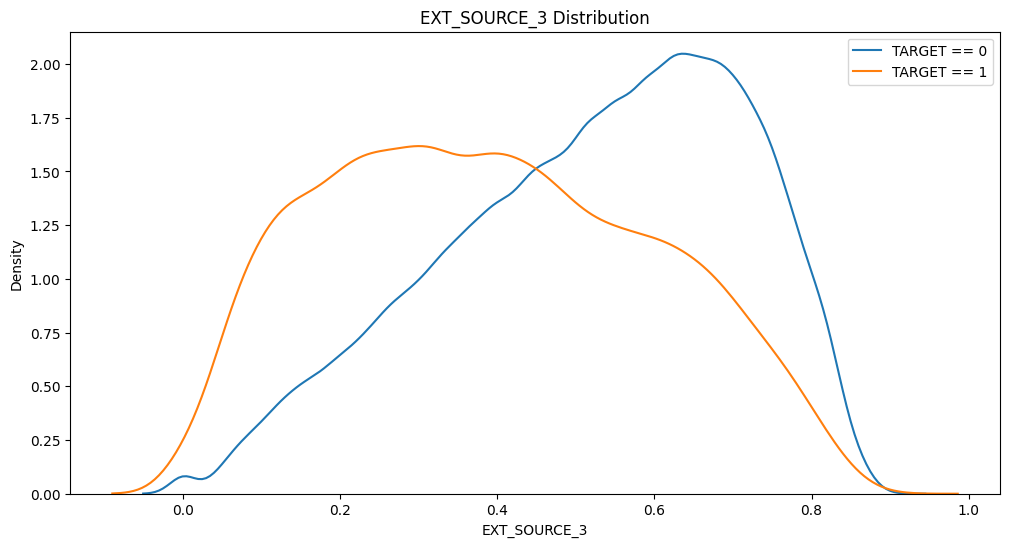

In [130]:
plot_numerical_bylabel(application_train, 'EXT_SOURCE_3')

 ### <a id='3-5'>3.5 Correlation Matrix</a>

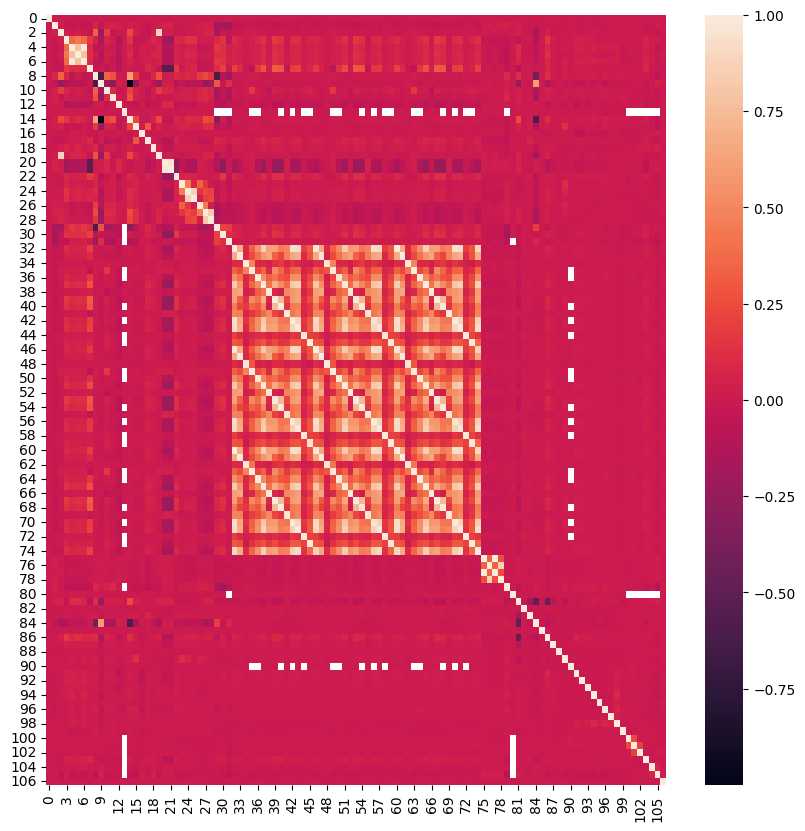

In [131]:
corr_mat = application_train.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation calculation
plt.figure(figsize=[10, 10])
sns.heatmap(corr_mat.values, annot=False)
plt.show()